In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns; sns.set_theme()
import warnings
from matplotlib.ticker import PercentFormatter
warnings.filterwarnings("ignore")

# Exploration Volume

## Load CSV

In [3]:
dataFrame = pd.read_table(r"./Data/FDAXM22-EUREX_5Min.csv", sep = ";", engine = 'python')
for col in dataFrame.columns:
    if col[0] == " ":
        dataFrame = dataFrame.rename(columns={col : col[1:]})

In [4]:
dataFrame_morning = pd.read_table("Data/dataIB.csv", sep = ";", engine = 'python')

In [5]:
dataFrame_daily = pd.read_table(r"./Data/DailyData_VolumeProfile.csv", sep = ";", engine = 'python')

In [6]:
dataFrame_norm = pd.read_table("Data/dataNormalisee5Min.csv", sep = ";", engine = 'python')

In [7]:
dataFrame_norm_daily = pd.read_table("Data/dataNormalisee.csv", sep = ";", engine = 'python')

In [8]:
dataFrame_norm_IB = pd.read_table("Data/dataIBNormalisee.csv", sep = ";", engine = 'python')

In [21]:
dataFrame_classif_daily = pd.read_table(r'Data/resultatsClassif_daily_norm.csv', sep = ";", engine = 'python')

In [25]:
dataFrame_classif_5min = pd.read_table(r'Data/resultatsClassif_5min_norm.csv', sep = ";", engine = 'python')

## Calcul de la moyenne des volumes par classe de Spread

In [10]:
volume = dataFrame.Volume
zscore_spread = dataFrame["etat variable 'spread'"]
volumes_par_classe = []
for classe in range(-2, 3):
    vol = []
    for i in range(len(volume)):
        if zscore_spread[i] == classe:
            vol.append(volume[i])
    volumes_par_classe.append(vol)

In [11]:
moyenne_volume_par_classe = [np.mean(vol) for vol in volumes_par_classe]

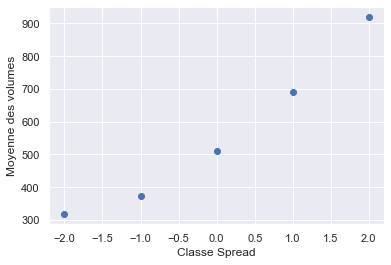

In [12]:
plt.scatter([-2, -1, 0, 1, 2], moyenne_volume_par_classe)
plt.ylabel("Moyenne des volumes")
plt.xlabel("Classe Spread")
plt.show()

### Matrice classe volumes / Spread

In [13]:
def classe_des_volumes_en_fonction_spread(zscore, volume, classe):
    classes = [0, 0, 0, 0, 0, 0, 0]
    for i in range(len(zscore)):
        if zscore[i] == classe:
            classes[volume[i] + 3] += 1
    return classes

In [14]:
def classe_spread_en_fonction_volume(zscore, volume, classe):
    classes = [0, 0, 0, 0, 0]
    for i in range(len(volume)):
        if volume[i] == classe:
            classes[zscore[i] + 2] += 1
    return classes

def classe_spread_en_fonction_volume_deux_classes(zscore, volume, classe):
    classes = [0, 0]
    for i in range(len(volume)):
        if volume[i] == classe:
            if zscore[i] == -2 or zscore[i] == -1:
                classes[0] += 1
            else:
                classes[1] += 1
    return classes

def classe_spread_en_fonction_volume_trois_classes(zscore, volume, classe):
    classes = [0, 0, 0]
    for i in range(len(volume)):
        if volume[i] == classe:
            if zscore[i] == -2 or zscore[i] == -1:
                classes[0] += 1
            elif zscore[i] == 0:
                classes[1] += 1
            else:
                classes[2] += 1
    return classes

In [15]:
def copy(array):
    new_array = []
    for i in range(len(array)):
        new_line = [0]*len(array[i])
        for j in range(len(array[i])):
            new_line[j] = array[i][j]
        new_array.append(new_line)
    return new_array

In [16]:
def pourcentage_ligne(matrice):
    new_matrice = copy(matrice)
    for i in range(len(matrice)):
        sum_ = np.sum(matrice[i])
        for j in range(len(matrice[i])):
            new_matrice[i][j] = 100* matrice[i][j]/sum_
    return new_matrice

def pourcentage_colonne(matrice):
    new_matrice = copy(matrice)
    for j in range(len(matrice[0])):
        sum_colonne = 0
        for i in range(len(matrice)):
            sum_colonne += matrice[i][j]
        for i in range(len(matrice)):
            new_matrice[i][j] = matrice[i][j]*100/sum_colonne
    return new_matrice

def pourcentage_total(matrice):
    sum_total = 0
    for i in range(len(matrice)):
        for j in range(len(matrice[i])):
            sum_total += matrice[i][j]
        
    new_matrice = copy(matrice)
    for i in range(len(matrice)):
        for j in range(len(matrice[i])):
            new_matrice[i][j] = matrice[i][j] * 100 / sum_total
            
    return new_matrice

In [17]:
def heatmap(matrice, x_axis_labels, y_axis_labels, provenance, time, *args):
    if len(args) == 0:
        couleur = 'Blues'
    else:
        couleur = args[0]
        
    matrix_pourcentage_ligne = pourcentage_ligne(matrice)
    matrix_pourcentage_colonne = pourcentage_colonne(matrice)
    matrix_pourcentage_total = pourcentage_total(matrice)
        
    plt.figure(figsize=(12,8))
    ax = sns.heatmap(matrix_pourcentage_ligne, annot=True, fmt=".2f", linewidth=1, cmap=couleur)
    ax.invert_yaxis()
    for t in ax.texts: t.set_text(t.get_text() + " %")
    ax.set_xticklabels(x_axis_labels, fontsize = 14)
    ax.set_yticklabels(y_axis_labels, fontsize = 14)

    plt.title('Valeurs ' + provenance+'\n' + time + ' - Pourcentage par ligne' + '\n', fontsize = 20) 
    plt.xlabel('Classe ZScore Spread', fontsize = 15) 
    plt.ylabel('Classe Zscore Volume', fontsize = 15) 
    plt.show()
    
    plt.figure(figsize=(12,8))
    ax = sns.heatmap(matrix_pourcentage_colonne, annot=True, fmt=".2f", linewidth=1, cmap=couleur)
    ax.invert_yaxis()
    for t in ax.texts: t.set_text(t.get_text() + " %")
    ax.set_xticklabels(x_axis_labels, fontsize = 14)
    ax.set_yticklabels(y_axis_labels, fontsize = 14)

    plt.title('Valeurs ' + provenance+'\n' + time + ' - Pourcentage par colonne' + '\n', fontsize = 20) 
    plt.xlabel('Classe ZScore Spread', fontsize = 15) 
    plt.ylabel('Classe Zscore Volume', fontsize = 15) 
    plt.show()
    
    plt.figure(figsize=(12,8))
    ax = sns.heatmap(matrix_pourcentage_total, annot=True, fmt=".2f", linewidth=1, cmap=couleur)
    ax.invert_yaxis()
    for t in ax.texts: t.set_text(t.get_text() + " %")
    ax.set_xticklabels(x_axis_labels, fontsize = 14)
    ax.set_yticklabels(y_axis_labels, fontsize = 14)

    plt.title('Valeurs ' + provenance+'\n' + time + ' - Pourcentage total' + '\n', fontsize = 20) 
    plt.xlabel('Classe ZScore Spread', fontsize = 15) 
    plt.ylabel('Classe Zscore Volume', fontsize = 15) 
    plt.show()

In [18]:
def calcul_tout(classe_spread, classe_volume, provenance, time, *args):
    if len(args) == 0:
        couleur = 'Blues'
    else:
        couleur = args[0]
    
    #spread en fonction du volume - toutes les classes
    print("Classe de Spread en fonction de la classe de volume")
    matrice_classe_spread_en_fonction_volume = []
    for i in range(-3, 4):
        c = classe_spread_en_fonction_volume(classe_spread, classe_volume, i)
        matrice_classe_spread_en_fonction_volume.append(c)
    
    y_axis_labels = [-3, -2, -1, 0, 1, 2, 3]
    x_axis_labels = [-2, -1, 0, 1, 2]
    heatmap(matrice_classe_spread_en_fonction_volume, x_axis_labels, y_axis_labels, provenance, time, *args)
    
    #spread en fonction du volume - 3 classes
    print("Classe de Spread en fonction de la classe de volume")
    print("Restriction à 3 classes")
    matrice_classe_spread_en_fonction_volume_trois_classes = []
    for i in range(-3, 4):
        c = classe_spread_en_fonction_volume_trois_classes(classe_spread, classe_volume, i)
        matrice_classe_spread_en_fonction_volume_trois_classes.append(c)
    
    y_axis_labels = [-3, -2, -1, 0, 1, 2, 3]
    x_axis_labels = [[-2, -1], [0], [1, 2]]
    heatmap(matrice_classe_spread_en_fonction_volume_trois_classes, x_axis_labels, y_axis_labels, provenance, time, *args)
    
    #spread en fonction du volume - 2 classes
    print("Classe de Spread en fonction de la classe de volume")
    print("Restriction à 2 classes")
    matrice_classe_spread_en_fonction_volume_deux_classes = []
    for i in range(-3, 4):
        c = classe_spread_en_fonction_volume_deux_classes(classe_spread, classe_volume, i)
        matrice_classe_spread_en_fonction_volume_deux_classes.append(c)
    
    y_axis_labels = [-3, -2, -1, 0, 1, 2, 3]
    x_axis_labels = [[-2, -1], [0, 1, 2]]
    heatmap(matrice_classe_spread_en_fonction_volume_deux_classes, x_axis_labels, y_axis_labels, provenance, time, *args)

# Valeurs fournies

## Tranches de 5 minutes

In [23]:
dataFrame_classif_daily

Date  Spread_daily_norm  Classif spread_daily_norm  \
0     02/01/2013           1.000000                         -1   
1     03/01/2013           0.742857                         -1   
2     04/01/2013           1.125000                          1   
3     07/01/2013           1.090909                          1   
4     08/01/2013           1.200658                          1   
...          ...                ...                        ...   
2328  16/03/2022           0.650760                         -1   
2329  17/03/2022           0.521739                         -1   
2330  18/03/2022           0.715982                         -1   
2331  21/03/2022           0.461795                         -2   
2332  22/03/2022           0.459672                         -2   

      Spread_IB_norm  Classif spread_IB_norm  Volume_daily_norm  \
0           1.000000                      -1           1.000000   
1           0.301887                      -2           0.789546   
2           0.515625                       0           0.897379   
3           0.915663                       1           0.856806   
4           0.721649                       0           1.045695   
...              ...                     ...                ...   
2328        0.602471                      -1           0.844885   
2329        0.751965                      -1           0.409866   
2330        0.592007                      -1           0.727066   
2331        0.576239                      -1           0.525200   
2332        0.502913                      -1           0.577178   

      Classif volume_daily_norm  Volume_IB_norm  Classif volume_IB_norm  
0                            -2        1.000000                      -2  
1                            -1        0.468229                      -3  
2                             0        0.522631                      -3  
3                            -1        0.788617                       0  
4                             1        0.803529                       0  
...                         ...             ...                     ...  
2328                         -1        1.000688                       0  
2329                         -3        0.319231                      -3  
2330                         -1        0.669168                      -1  
2331                         -3        0.594074                      -2  
2332                         -3        0.433648                      -3  

[2333 rows x 9 columns]

In [26]:
dataFrame_classif_5min

Date                        Time  Spread_normalisé  \
0       02/01/2013  <module 'time' (built-in)>          1.000000   
1       02/01/2013                         NaN          0.392157   
2       02/01/2013                         NaN          0.166667   
3       02/01/2013                         NaN          0.210526   
4       02/01/2013                         NaN          0.250000   
...            ...                         ...               ...   
395976  01/04/2022                         NaN          1.099476   
395977  01/04/2022                         NaN          1.414141   
395978  01/04/2022                         NaN          1.981735   
395979  01/04/2022                         NaN          1.906383   
395980  01/04/2022                         NaN          0.000000   

        Classif spread_normalisé  Volume_normalisé  Classif volume_normalisé  
0                             -1          1.000000                        -2  
1                             -2          0.471440                        -2  
2                             -2          0.404586                        -2  
3                             -2          0.282197                        -3  
4                             -2          0.339297                        -1  
...                          ...               ...                       ...  
395976                         0          1.155080                         0  
395977                         1          1.595588                         1  
395978                         2          2.920299                         3  
395979                         1          2.309121                         1  
395980                        -2          0.039106                        -3  

[395981 rows x 6 columns]

In [27]:
classe_spread = dataFrame_classif_5min["Classif spread_normalisé"]
volume = dataFrame.Volume
classe_volume = dataFrame_classif_5min["Classif volume_normalisé"]

Classe de Spread en fonction de la classe de volume


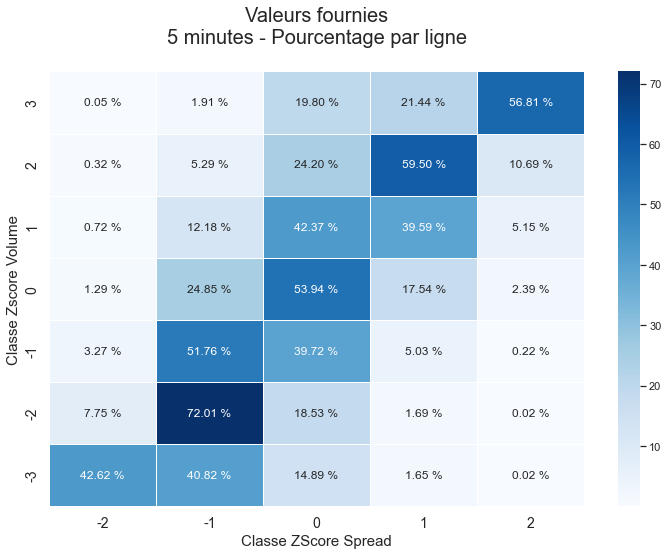

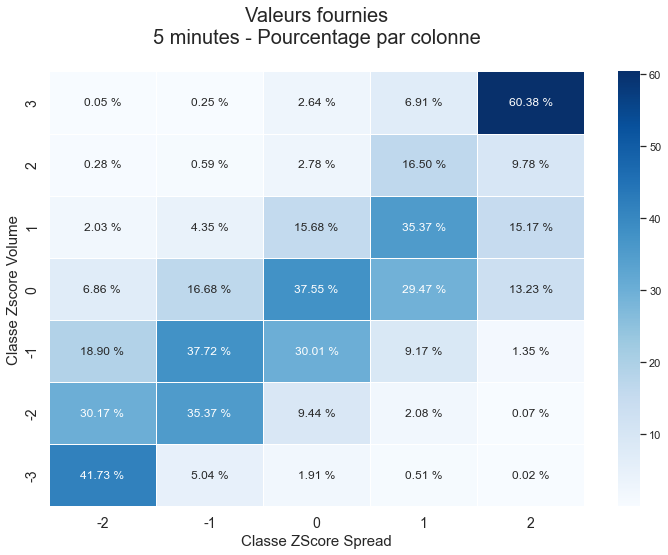

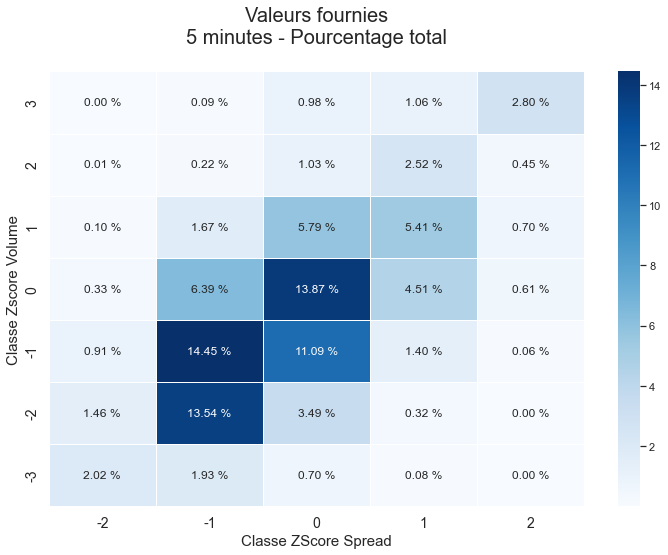

Classe de Spread en fonction de la classe de volume
Restriction à 3 classes


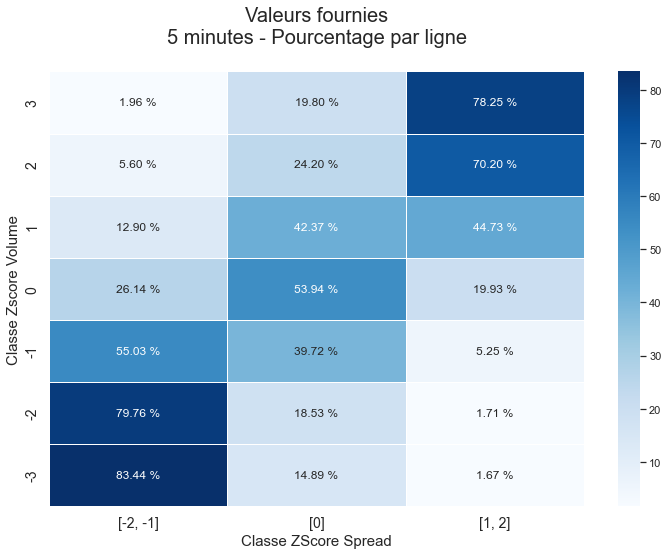

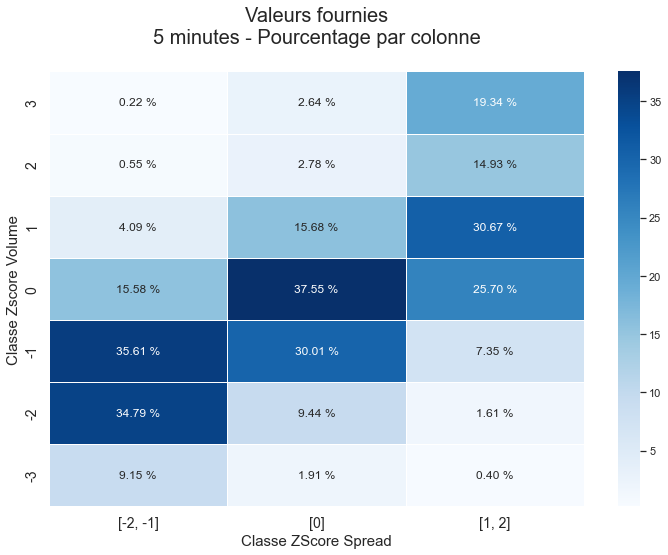

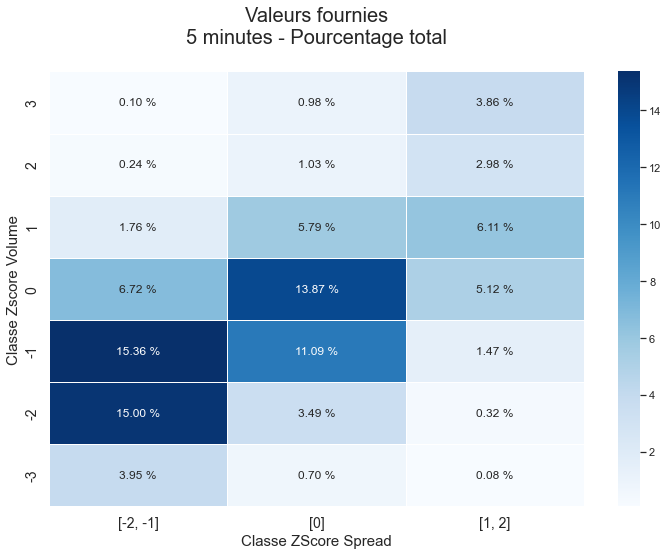

Classe de Spread en fonction de la classe de volume
Restriction à 2 classes


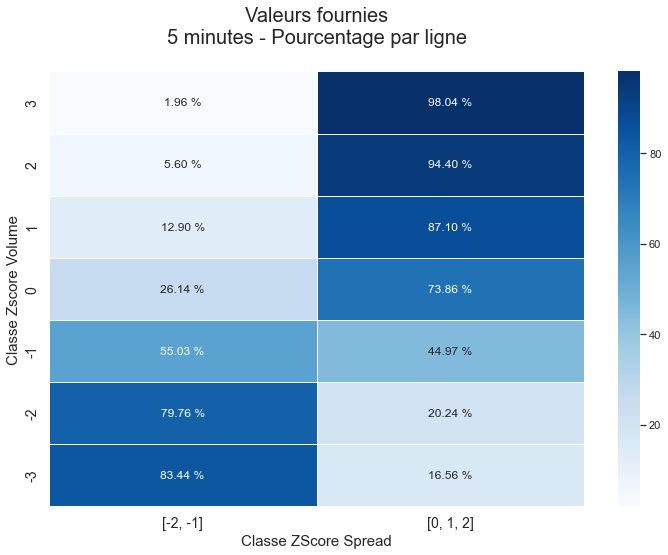

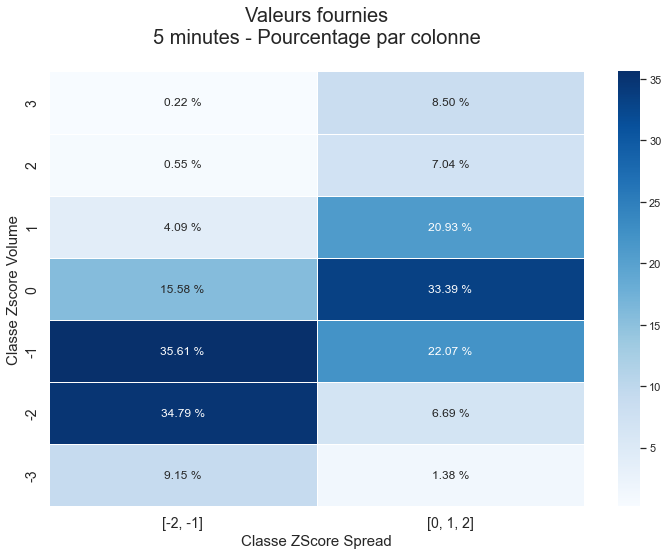

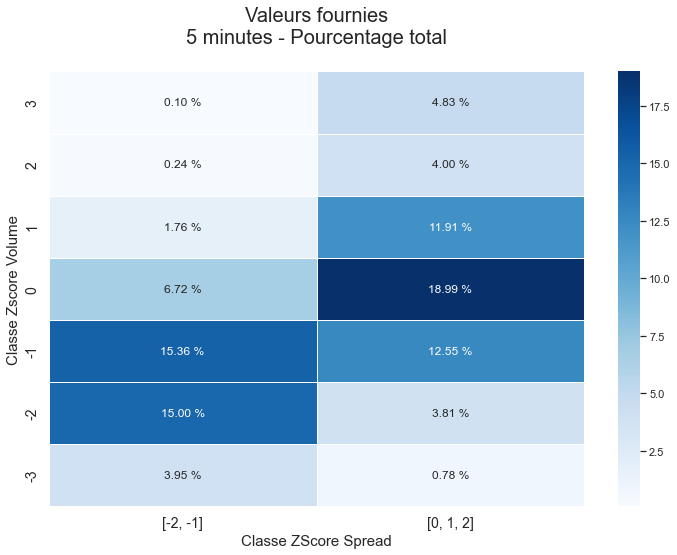

In [29]:
calcul_tout(classe_spread, classe_volume, "calculées", "5 minutes")

## Journalier

In [30]:
classe_spread_daily = dataFrame_classif_daily["Classif spread_daily_norm"]
volume_daily = dataFrame_daily.Volume
classe_volume_daily = dataFrame_classif_daily["Classif volume_daily_norm"]

Classe de Spread en fonction de la classe de volume


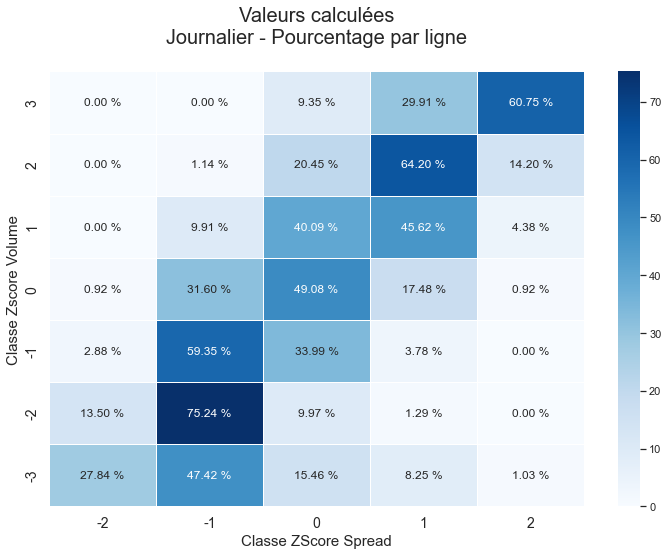

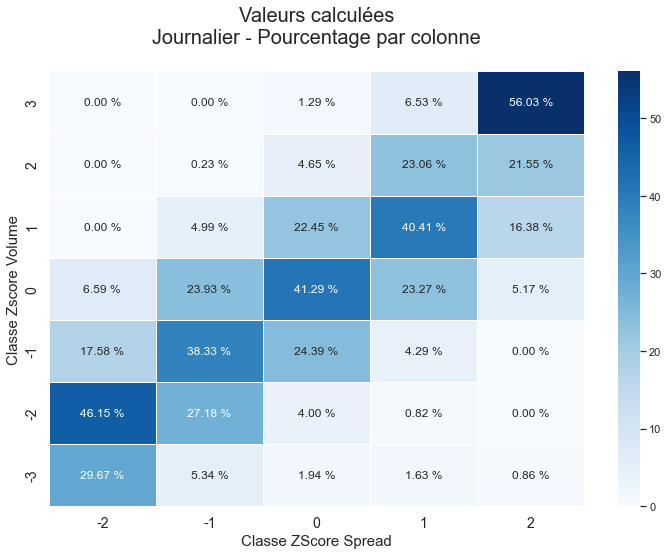

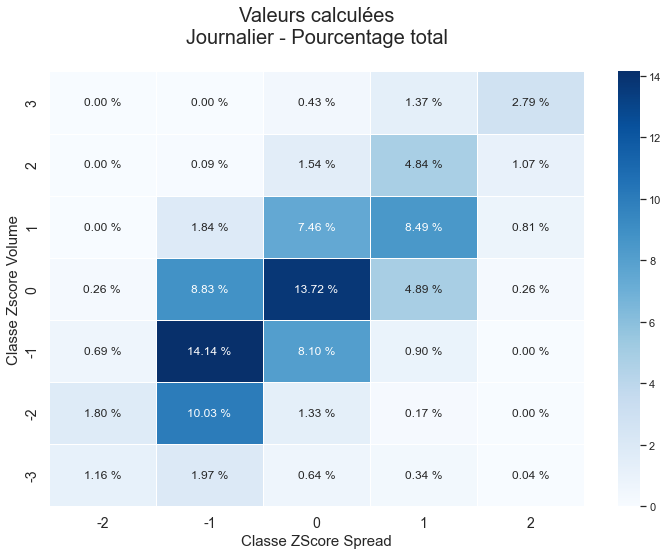

Classe de Spread en fonction de la classe de volume
Restriction à 3 classes


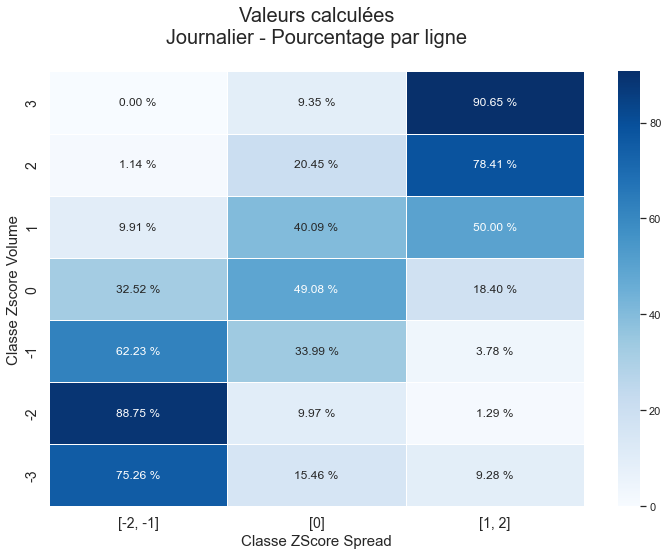

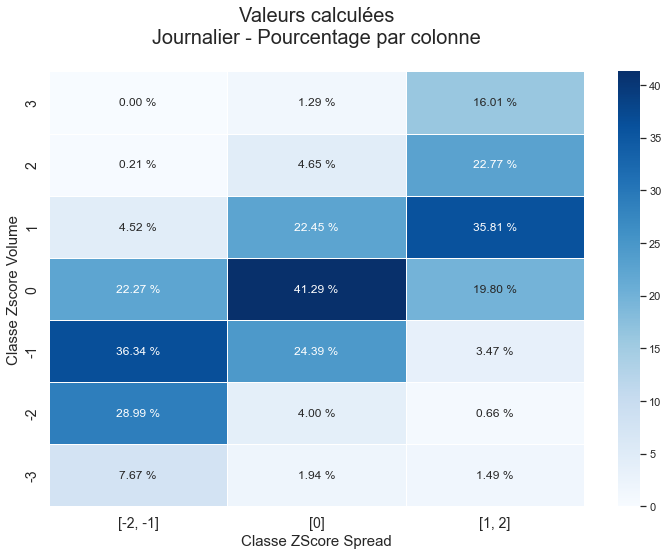

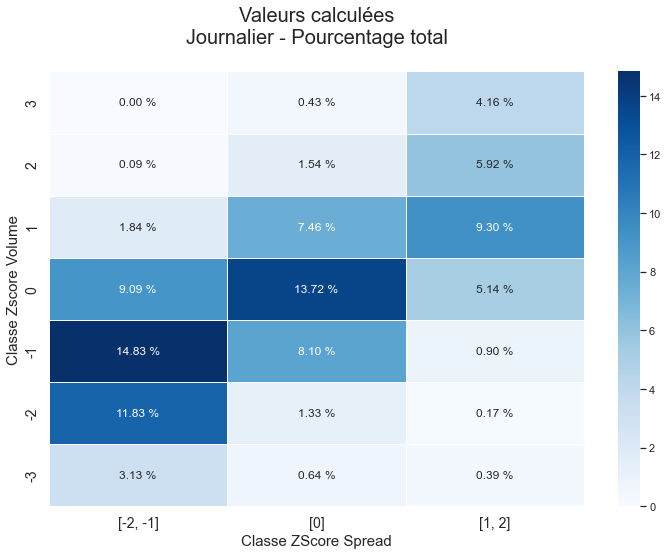

Classe de Spread en fonction de la classe de volume
Restriction à 2 classes


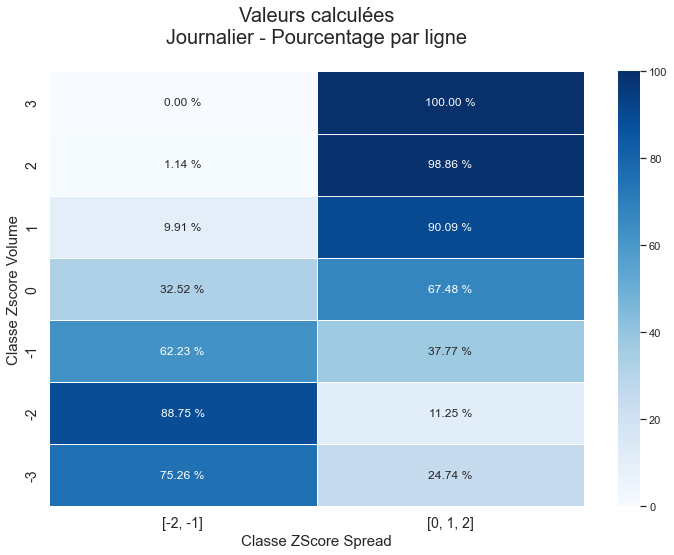

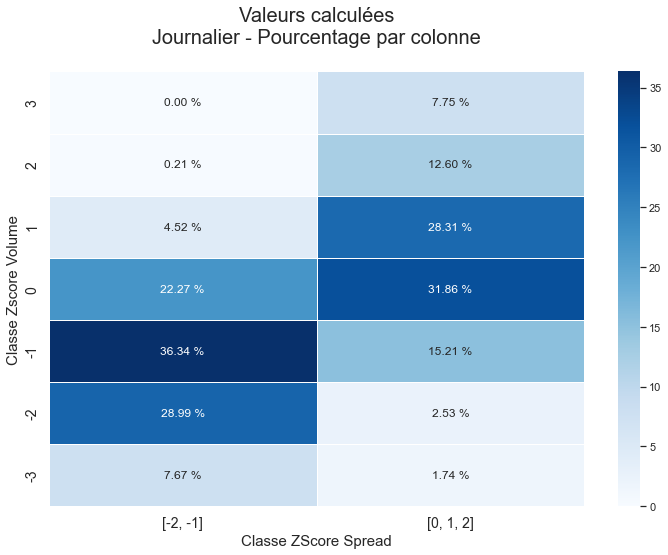

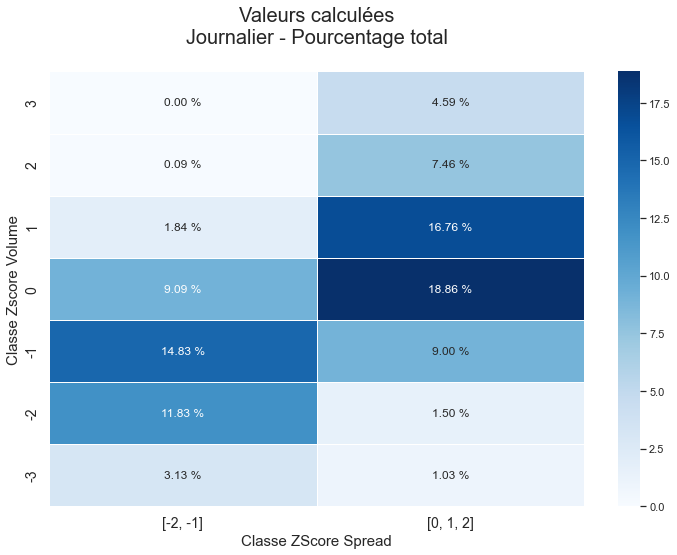

In [31]:
calcul_tout(classe_spread_daily, classe_volume_daily, "calculées", "Journalier")

## Initial Balance

In [32]:
classe_spread_IB = dataFrame_classif_daily["Classif spread_IB_norm"]
volume_IB = dataFrame_morning.Volume
classe_volume_IB = dataFrame_classif_daily["Classif volume_IB_norm"]

Classe de Spread en fonction de la classe de volume


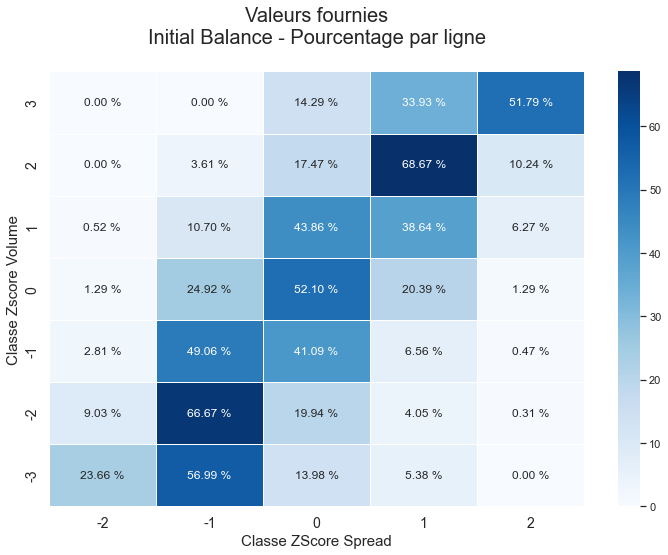

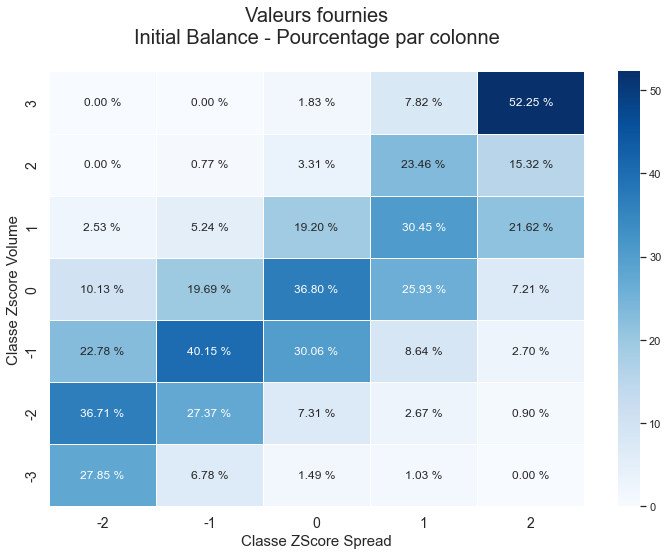

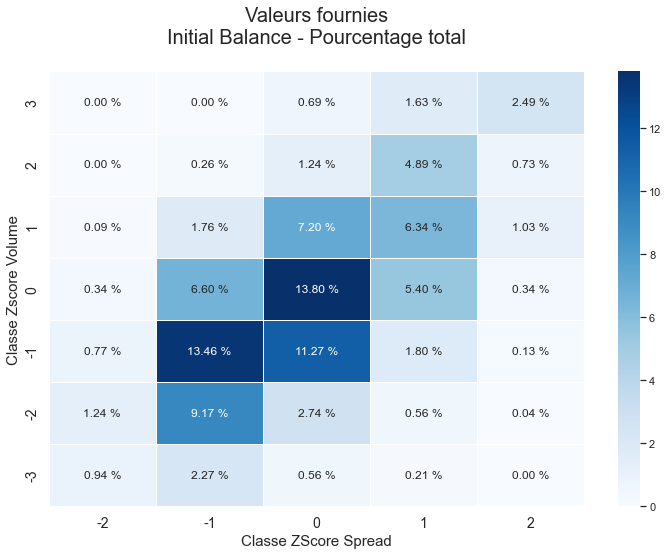

Classe de Spread en fonction de la classe de volume
Restriction à 3 classes


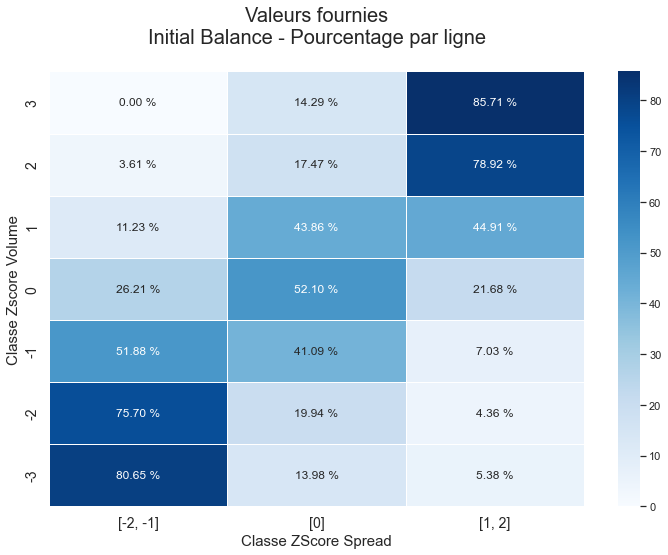

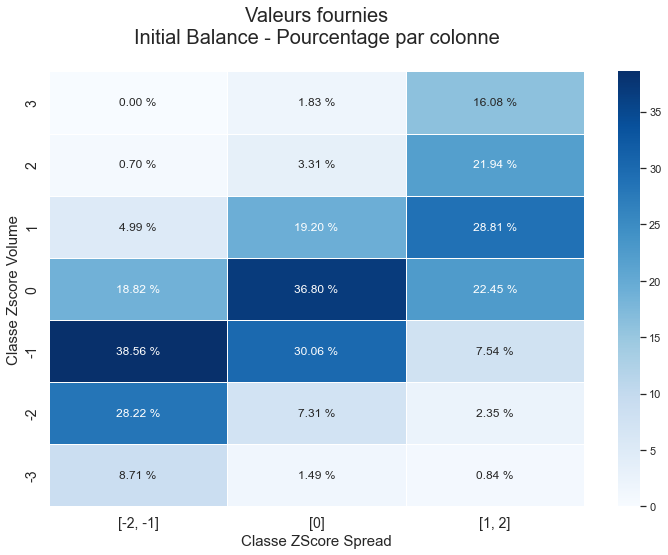

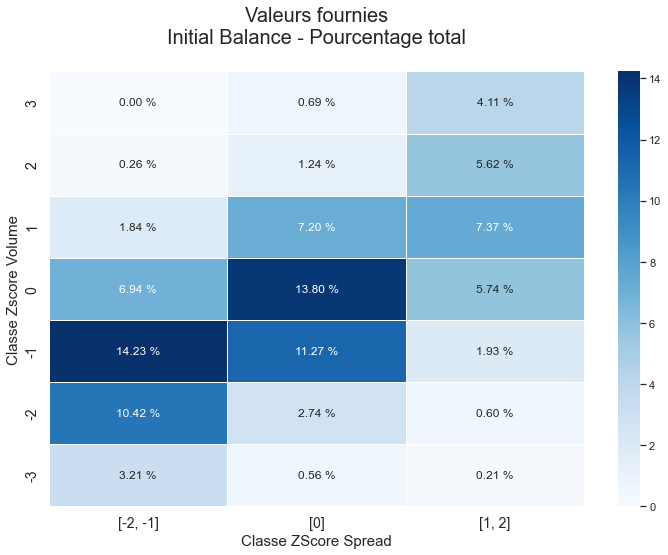

Classe de Spread en fonction de la classe de volume
Restriction à 2 classes


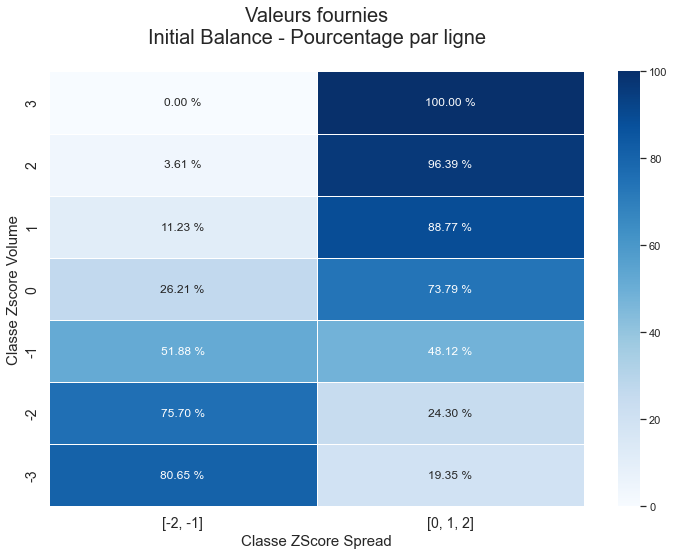

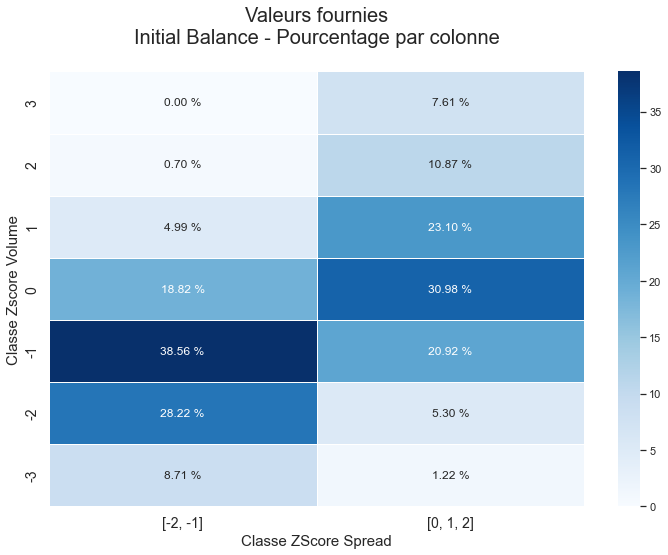

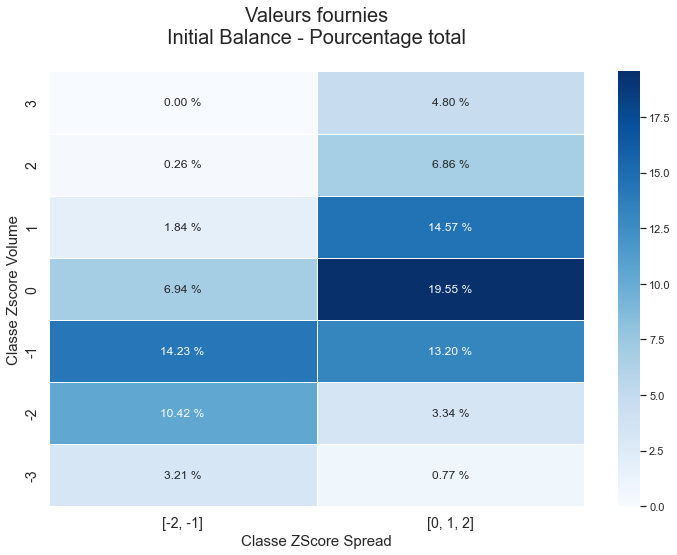

In [33]:
calcul_tout(classe_spread_IB, classe_volume_IB, "fournies", "Initial Balance")

# Classes de Spread calculées, classes de volume de fournies

## 5 minutes

In [26]:
classe_spread_calcul = dataFrame_results_ZScore_5min["ZScore Spread 5min"]
classe_volume = dataFrame["etat variable 'Volume'"]

Classe de Spread en fonction de la classe de volume


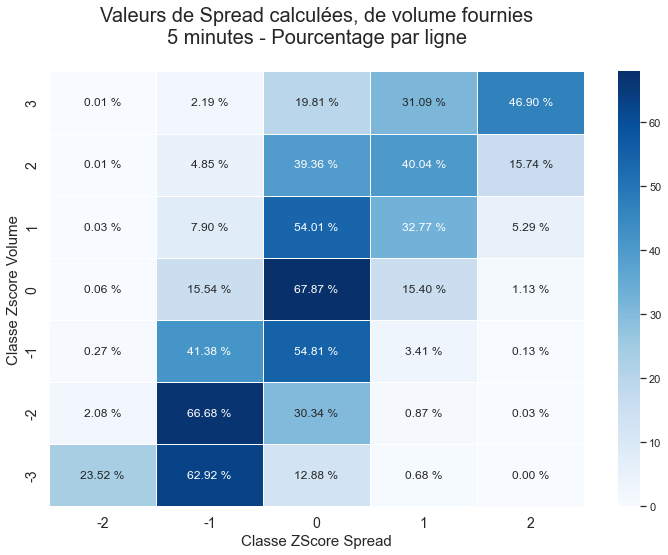

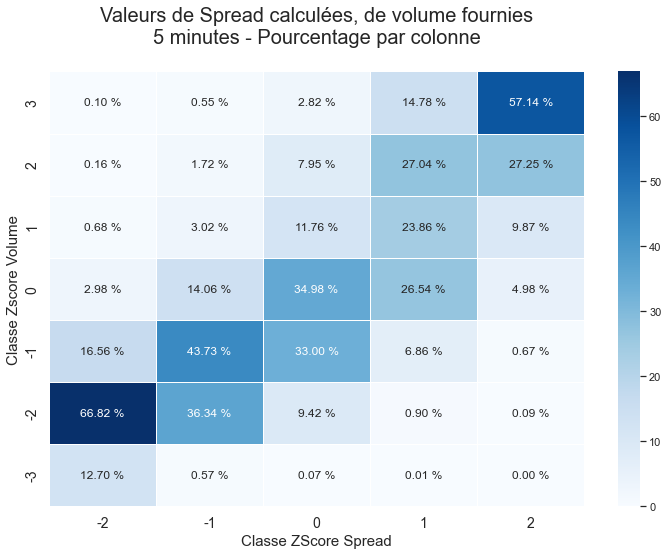

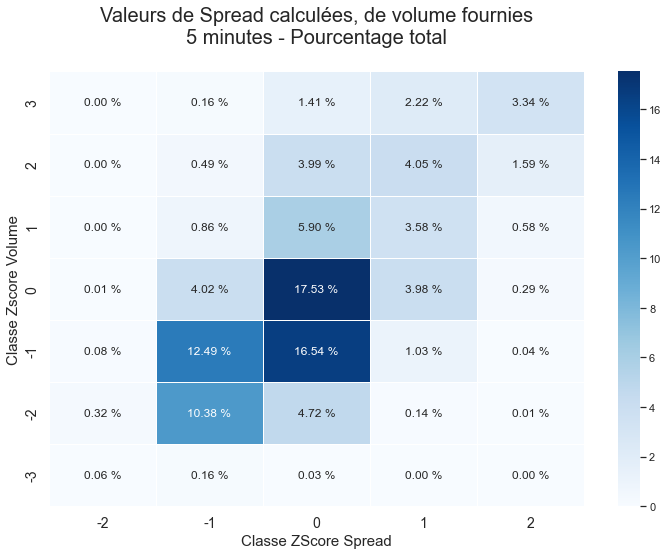

Classe de Spread en fonction de la classe de volume
Restriction à 3 classes


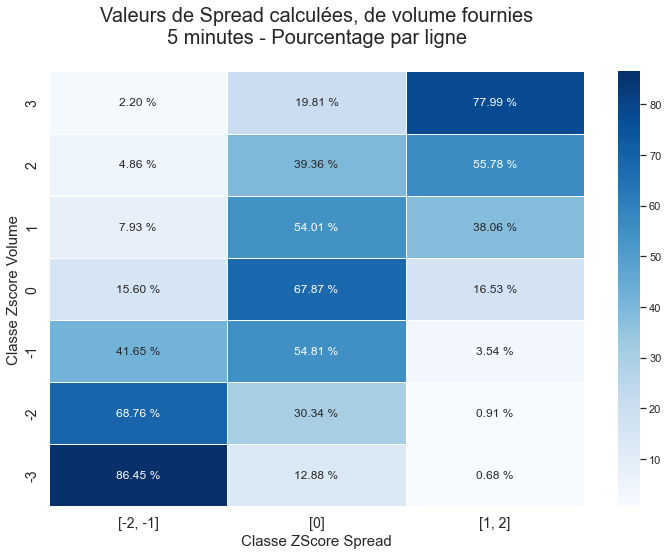

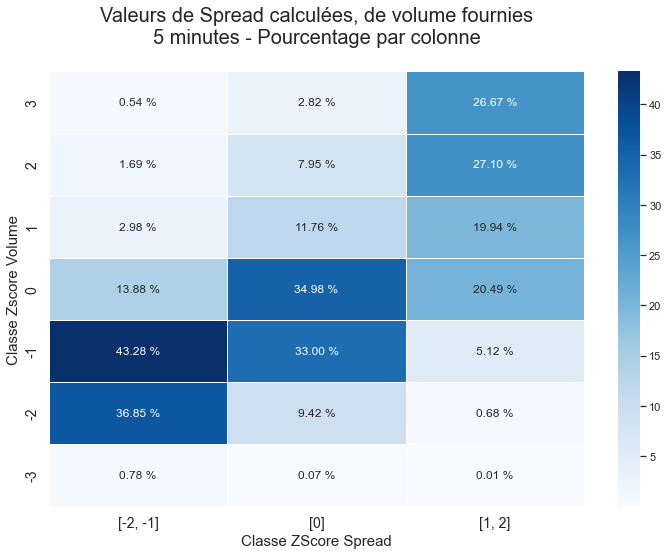

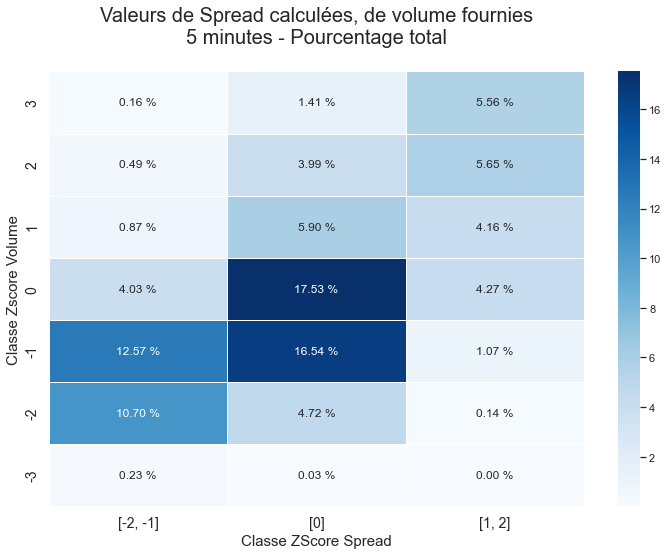

Classe de Spread en fonction de la classe de volume
Restriction à 2 classes


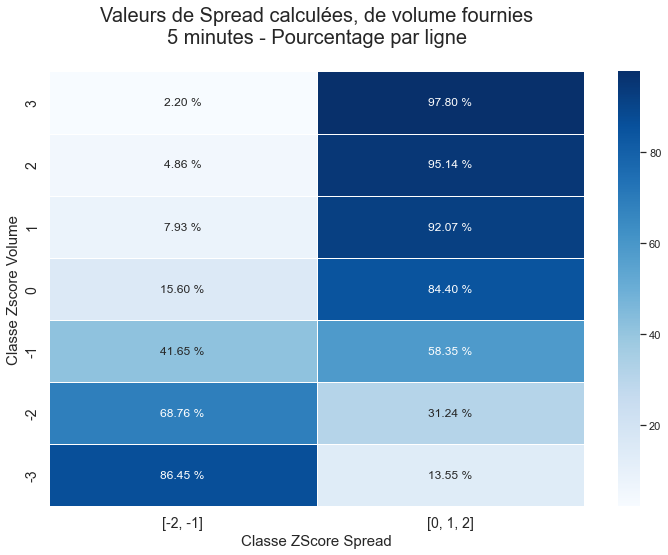

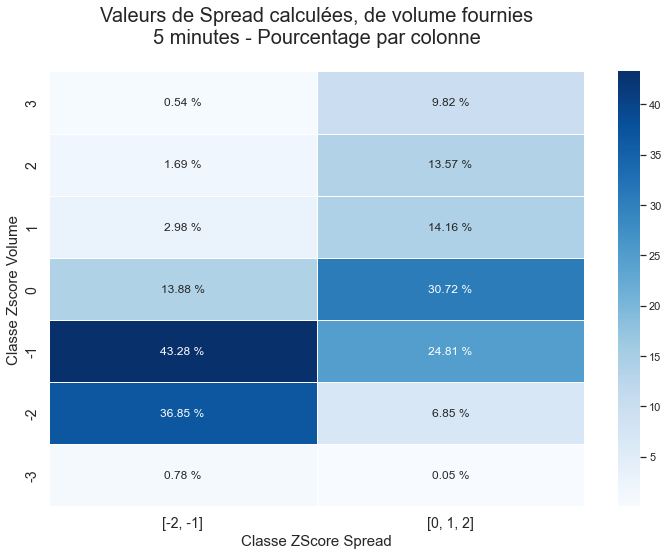

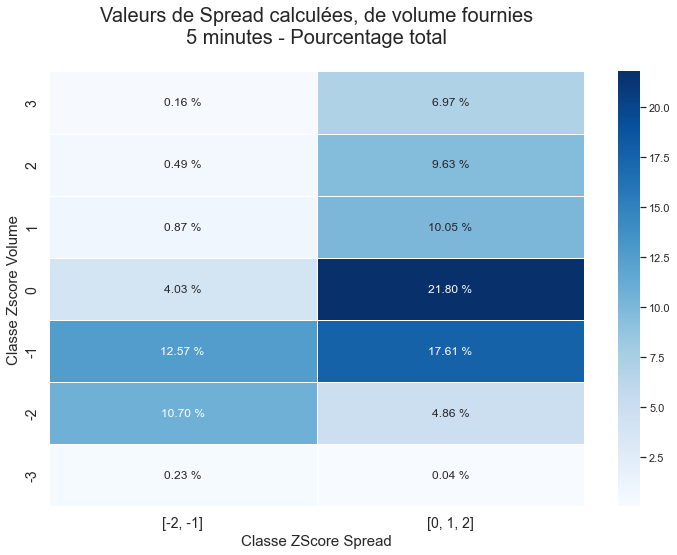

In [27]:
calcul_tout(classe_spread_calcul, classe_volume, "de Spread calculées, de volume fournies", "5 minutes")

## Journalier

In [28]:
classe_spread_calcul_daily = dataFrame_results_ZScore["ZScore Spread Daily"]
classe_volume_daily = dataFrame_daily["etat variable 'Volume'"]

Classe de Spread en fonction de la classe de volume


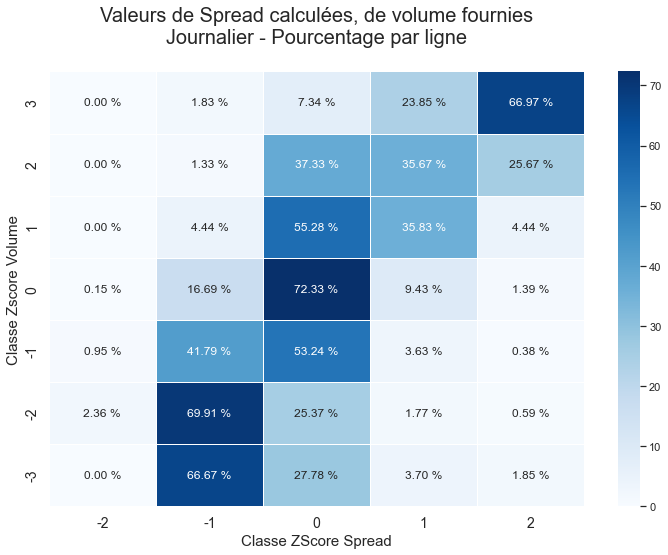

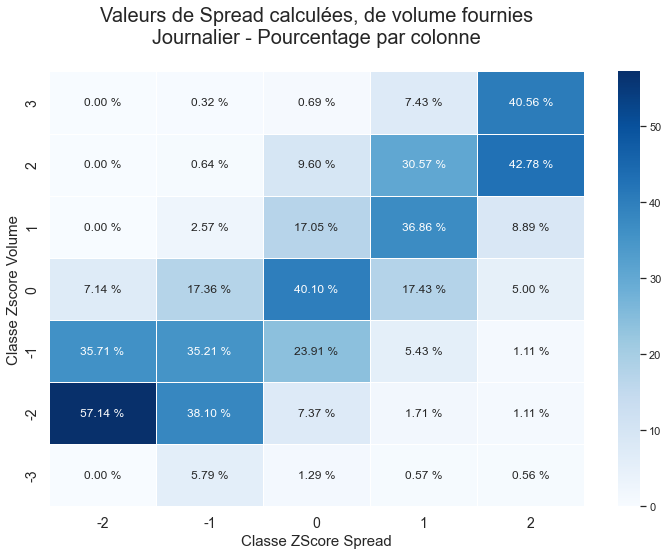

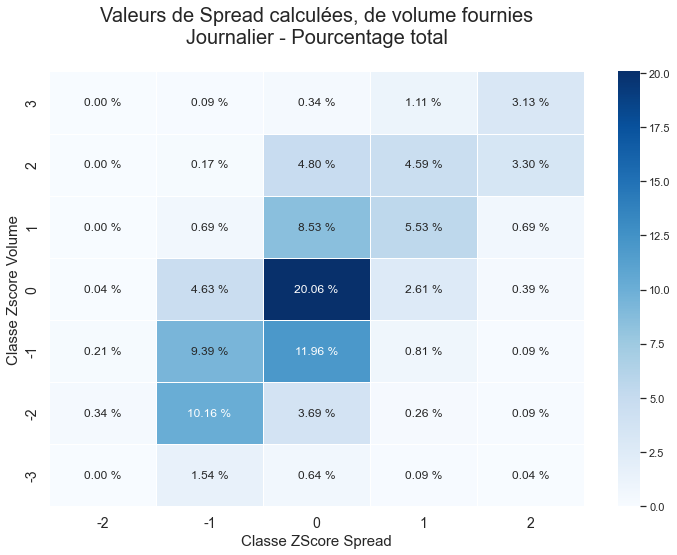

Classe de Spread en fonction de la classe de volume
Restriction à 3 classes


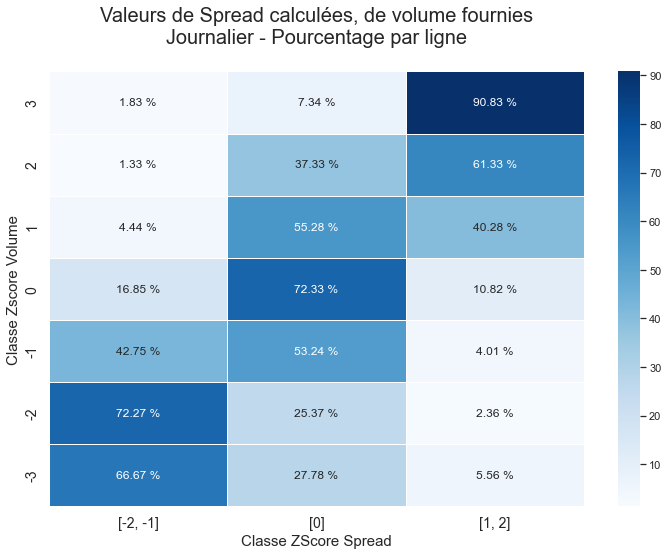

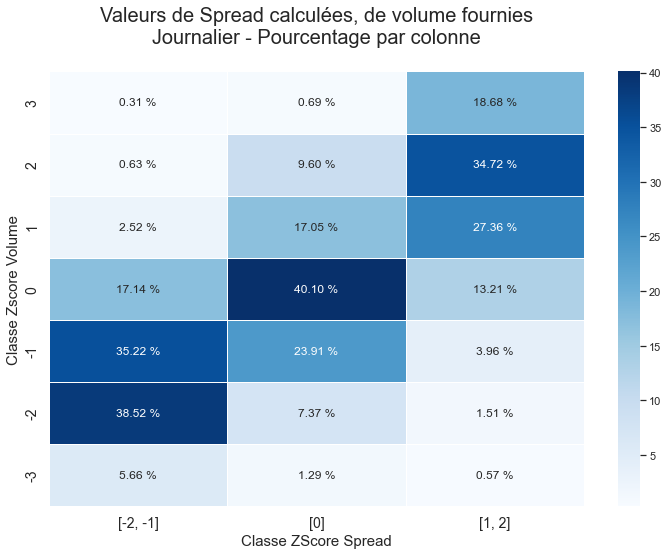

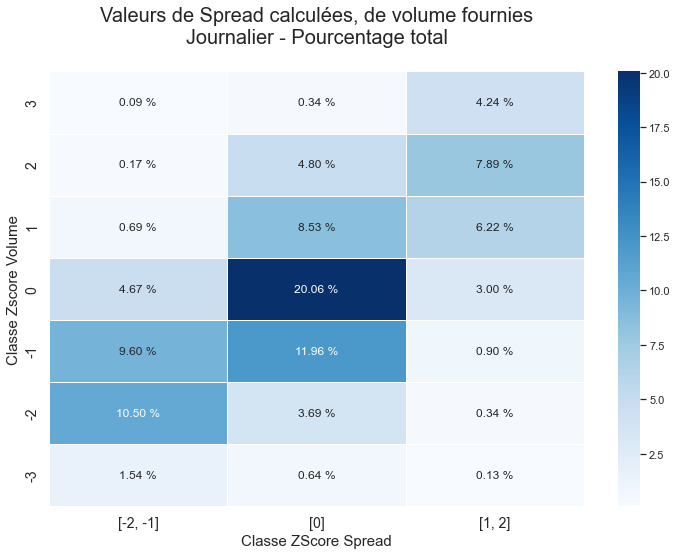

Classe de Spread en fonction de la classe de volume
Restriction à 2 classes


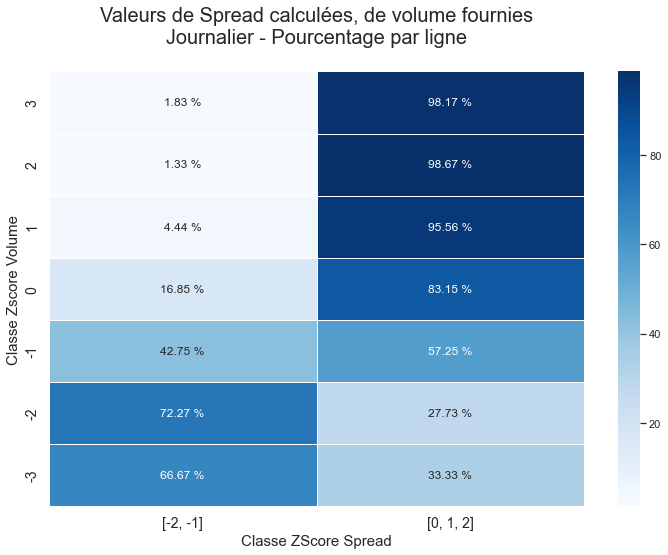

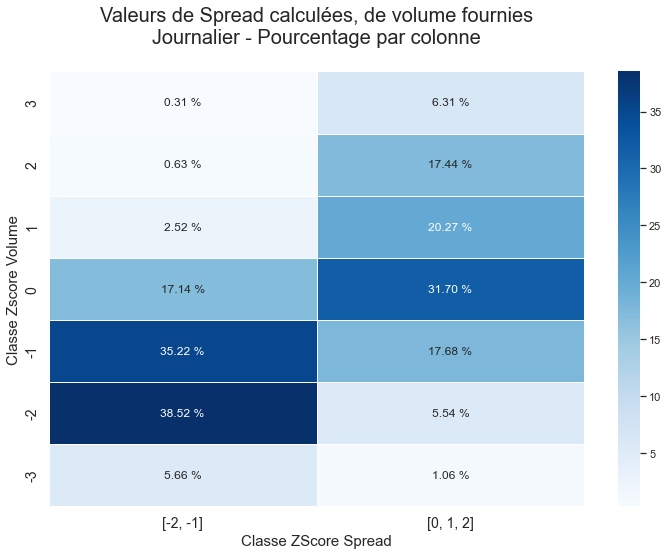

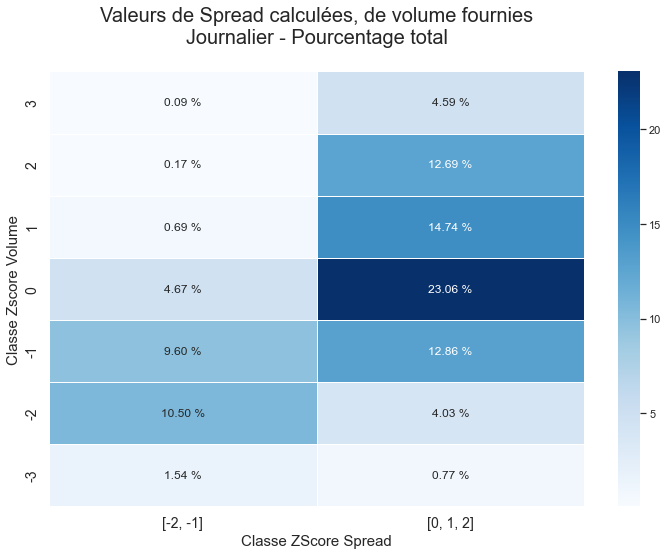

In [29]:
calcul_tout(classe_spread_calcul_daily, classe_volume_daily, "de Spread calculées, de volume fournies", "Journalier")

## Initial Balance

In [30]:
classe_spread_calcul_IB = dataFrame_results_ZScore["ZScore Spread IB"]
classe_volume_IB = classe_volume_daily

Classe de Spread en fonction de la classe de volume


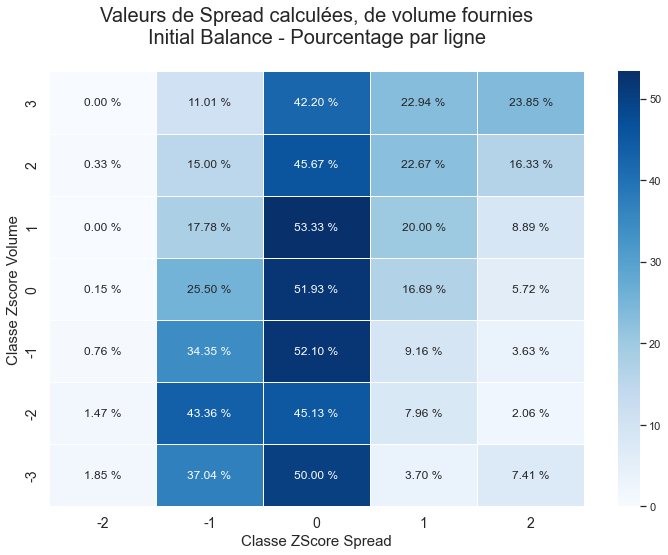

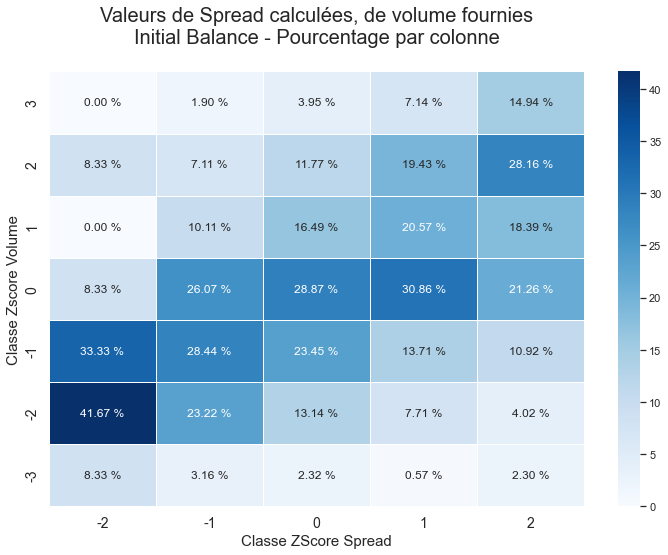

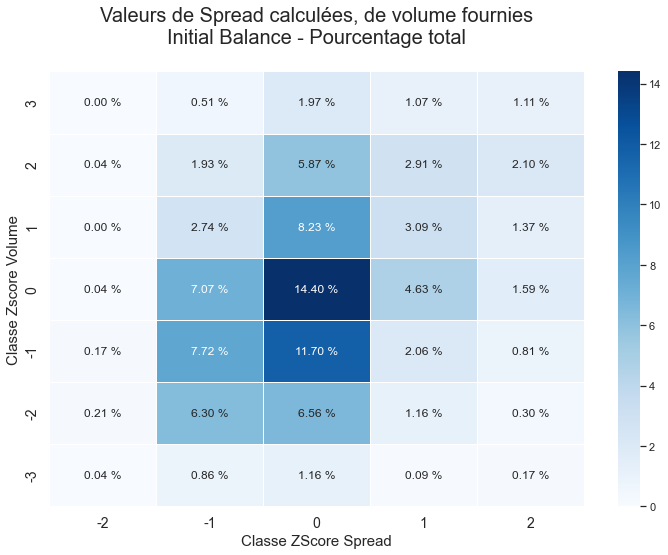

Classe de Spread en fonction de la classe de volume
Restriction à 3 classes


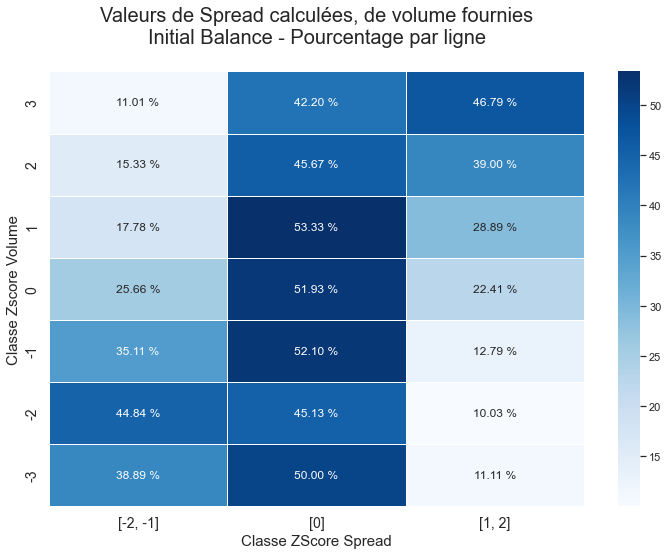

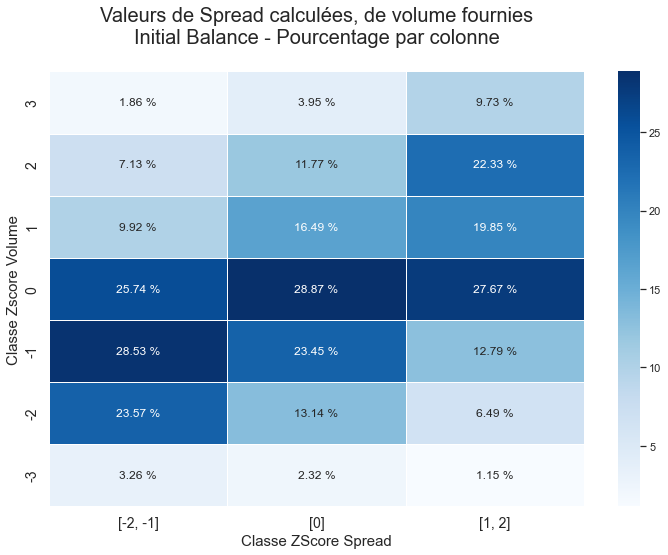

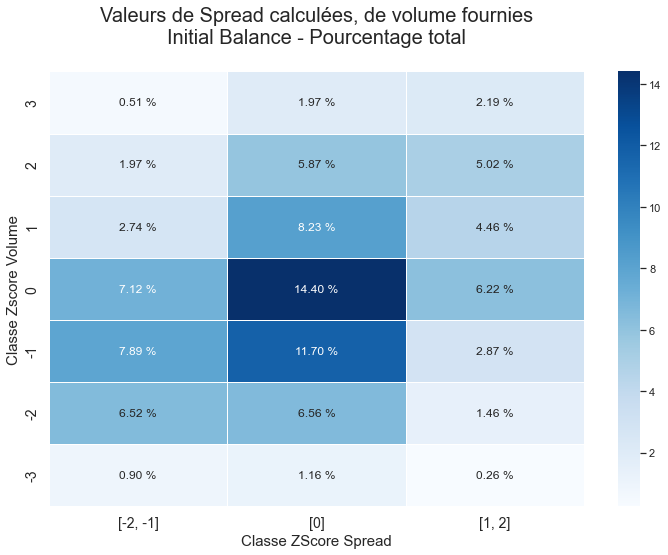

Classe de Spread en fonction de la classe de volume
Restriction à 2 classes


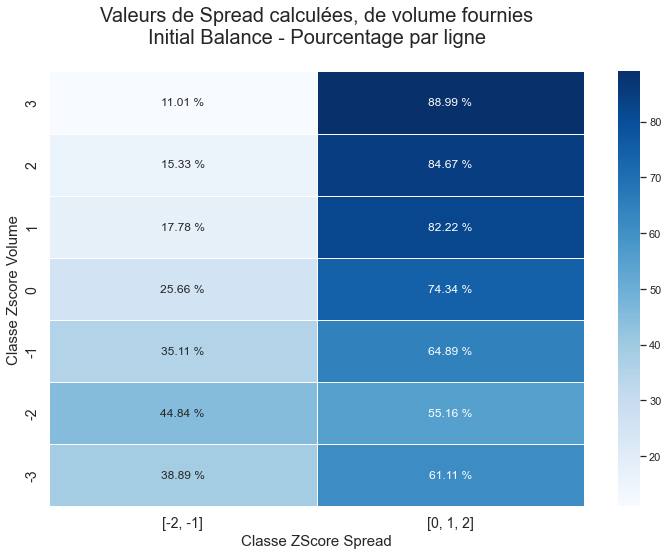

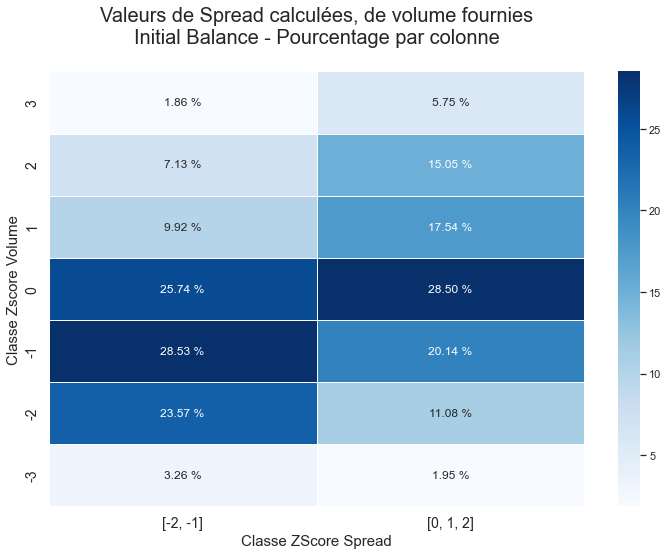

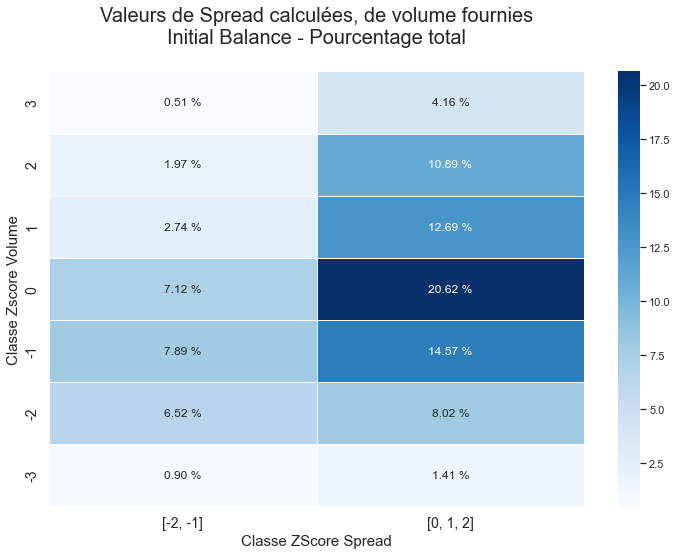

In [31]:
calcul_tout(classe_spread_calcul_IB, classe_volume_IB, "de Spread calculées, de volume fournies", "Initial Balance")

# Classes de Spread fournies, classes de Volume calculées

## 5 minutes

In [32]:
classe_spread = dataFrame["etat variable 'spread'"]
classe_volume_calcul = dataFrame_results_ZScore_5min["ZScore Volume 5min"]

Classe de Spread en fonction de la classe de volume


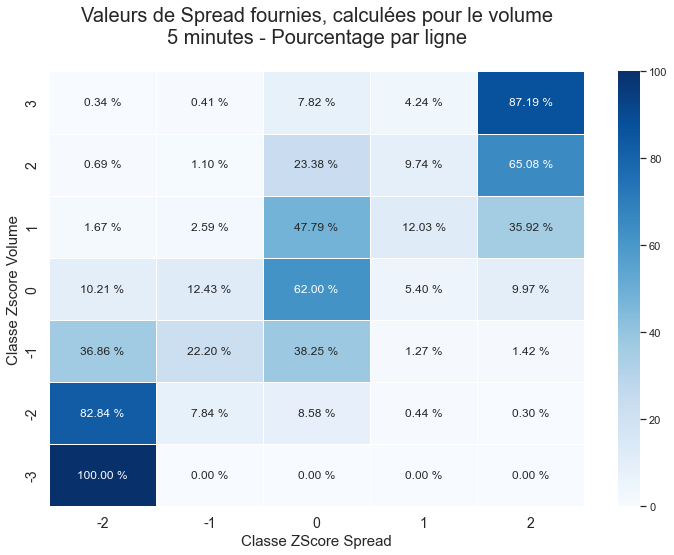

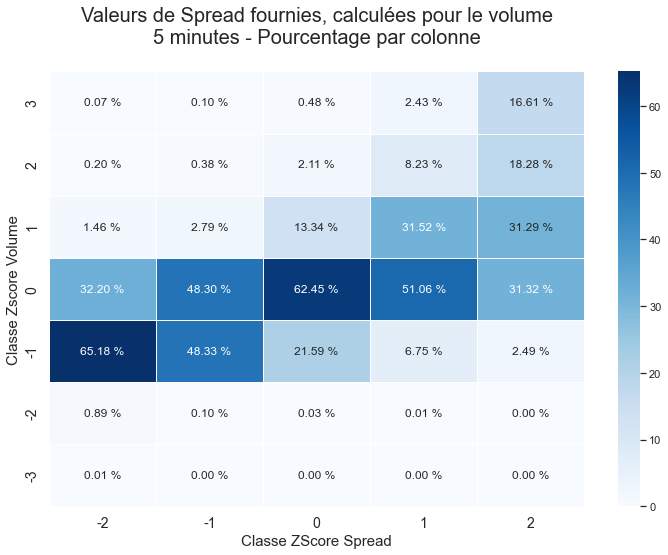

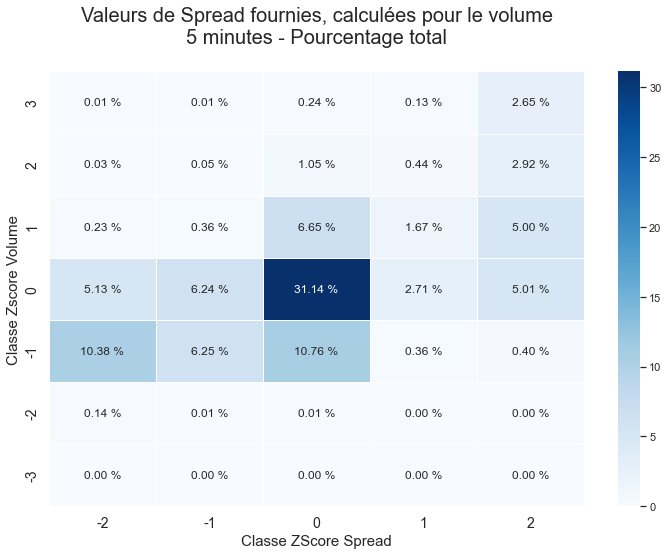

Classe de Spread en fonction de la classe de volume
Restriction à 3 classes


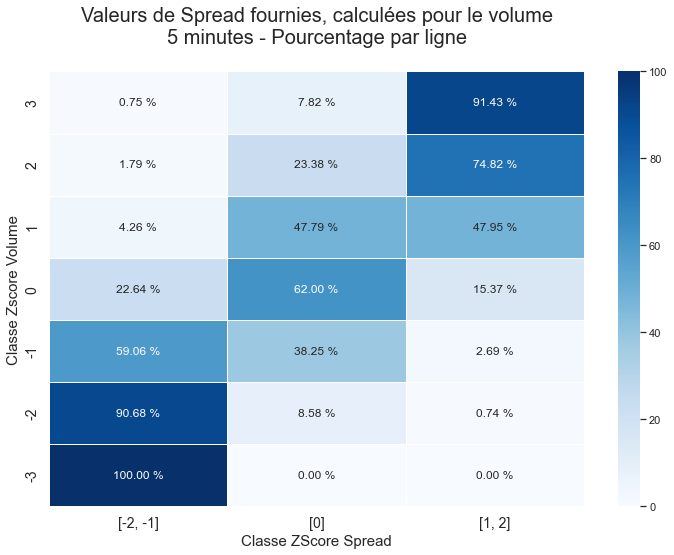

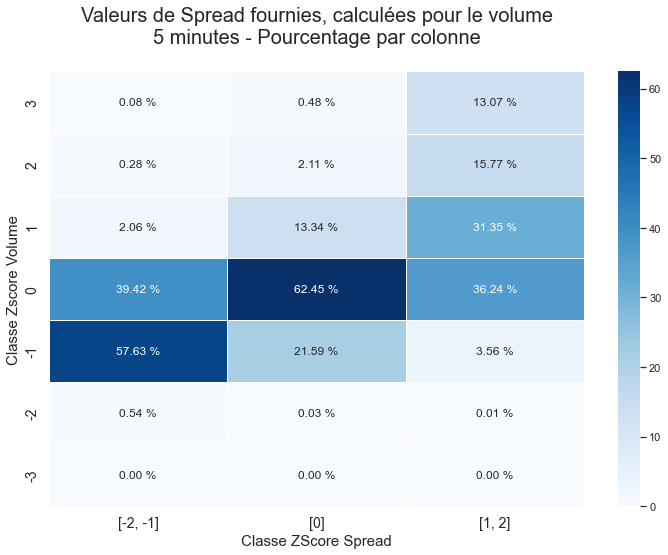

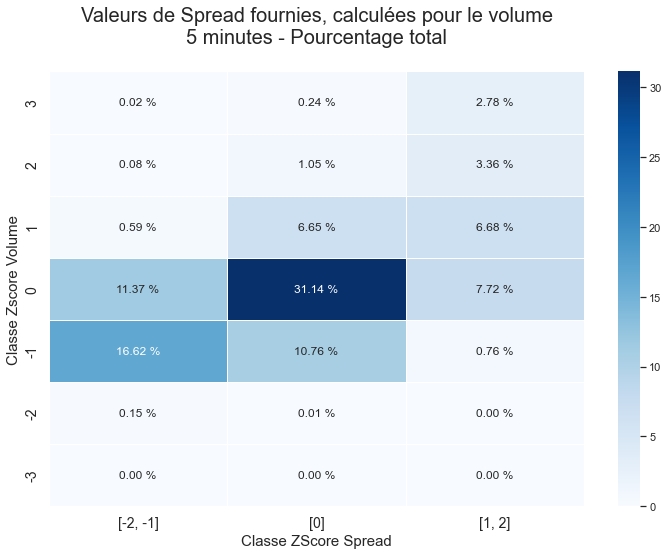

Classe de Spread en fonction de la classe de volume
Restriction à 2 classes


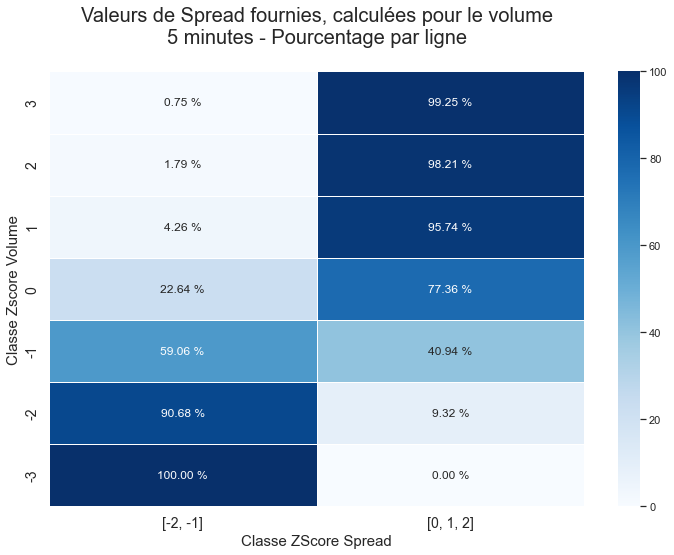

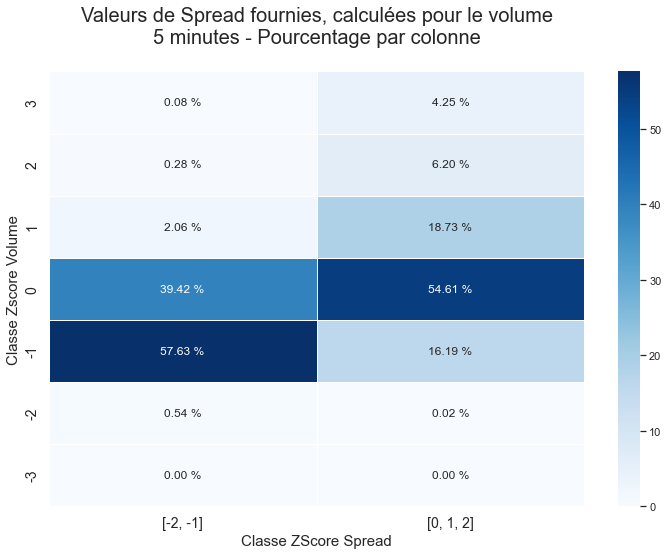

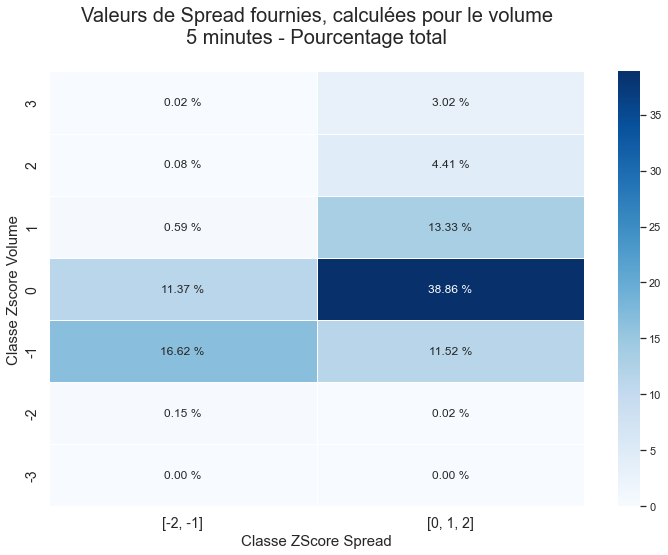

In [33]:
calcul_tout(classe_spread, classe_volume_calcul, "de Spread fournies, calculées pour le volume", "5 minutes")

## Journalier

In [34]:
classe_spread_daily = dataFrame_daily["etat variable 'spread'"]
classe_volume_calcul_daily = dataFrame_results_ZScore["ZScore Volume Daily"]

Classe de Spread en fonction de la classe de volume


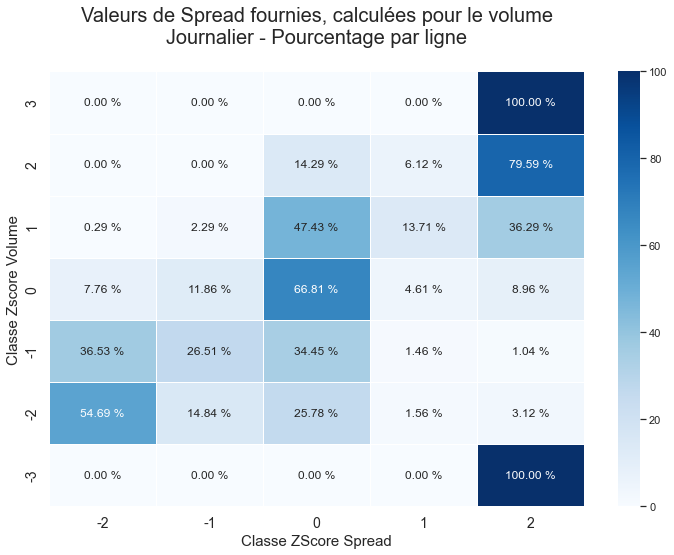

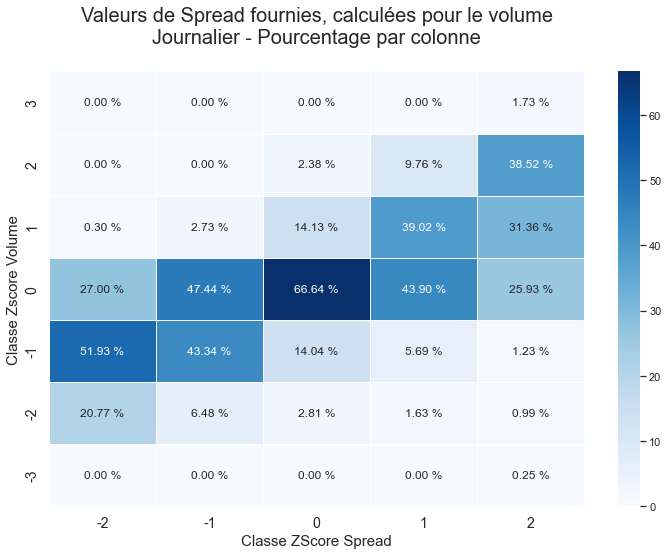

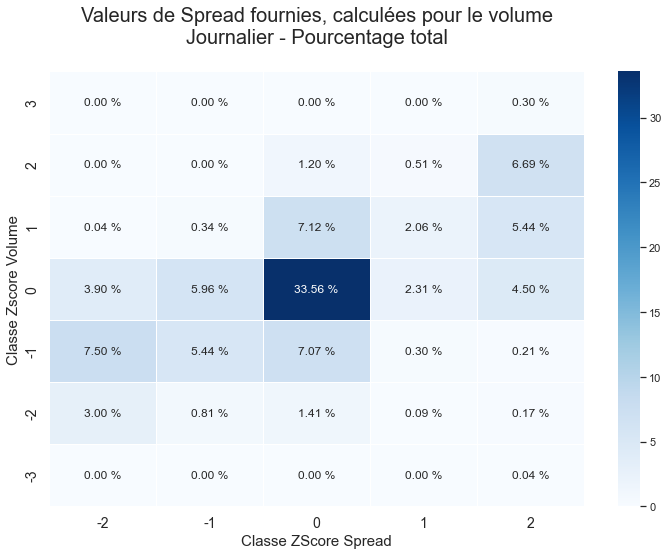

Classe de Spread en fonction de la classe de volume
Restriction à 3 classes


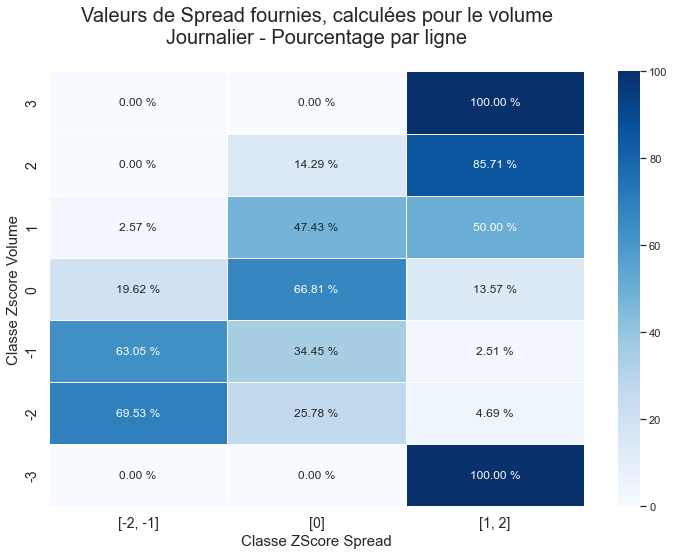

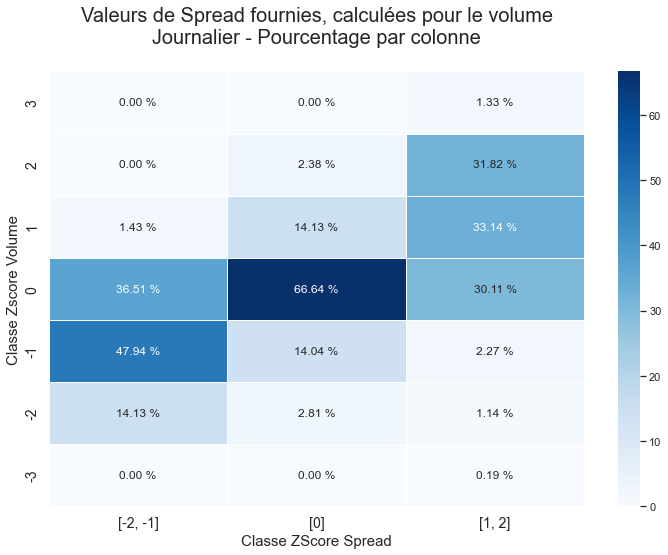

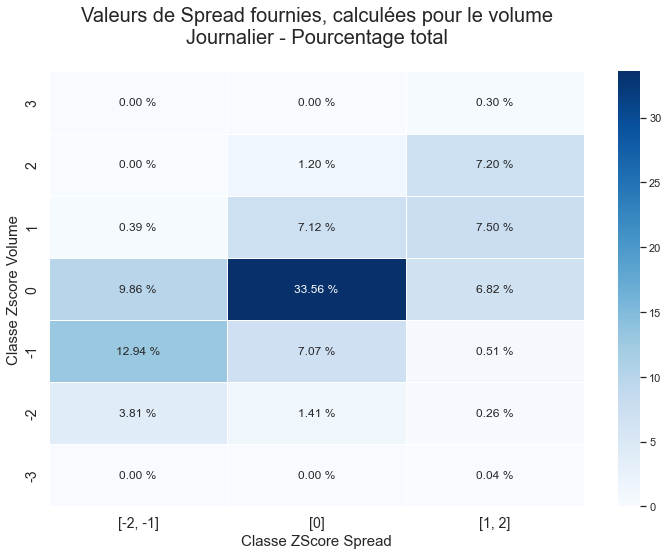

Classe de Spread en fonction de la classe de volume
Restriction à 2 classes


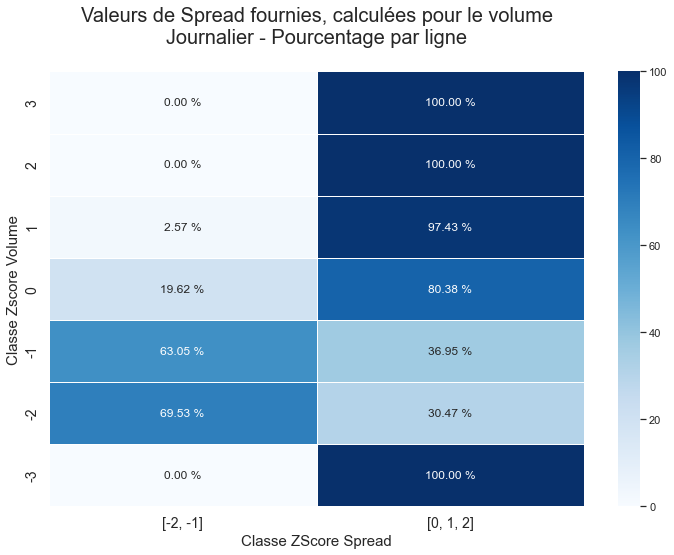

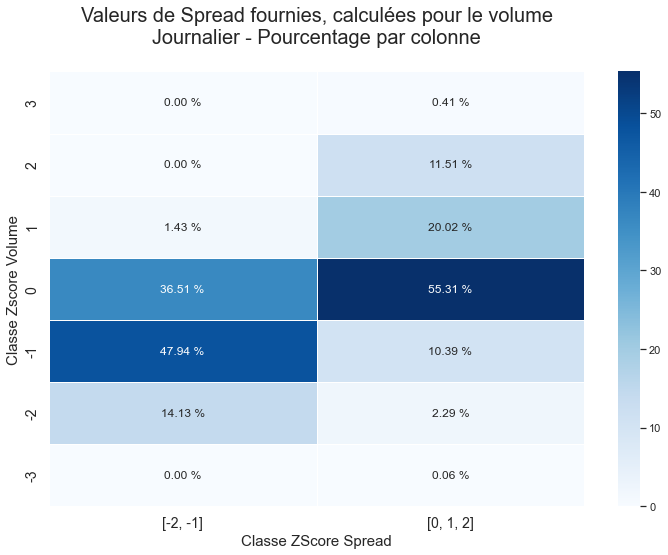

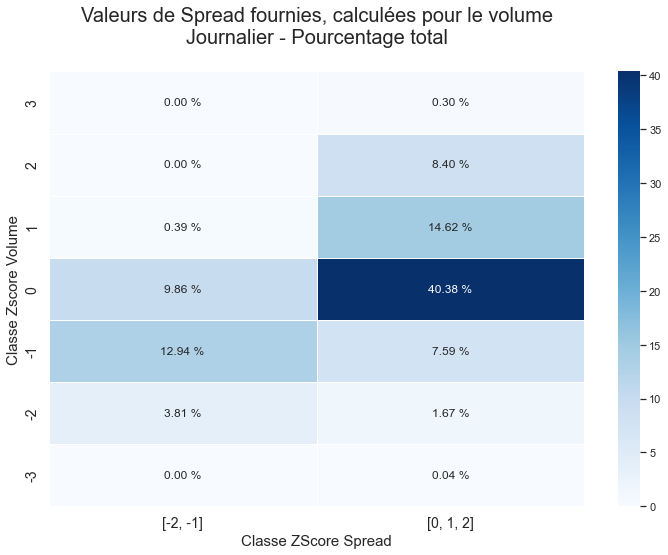

In [35]:
calcul_tout(classe_spread_daily, classe_volume_calcul_daily, "de Spread fournies, calculées pour le volume", "Journalier")

## Initial Balance

In [36]:
classe_spread_IB = dataFrame_daily['IB_EtatSpread']
classe_volume_calcul_IB = dataFrame_results_ZScore["ZScore Volume IB"]

Classe de Spread en fonction de la classe de volume


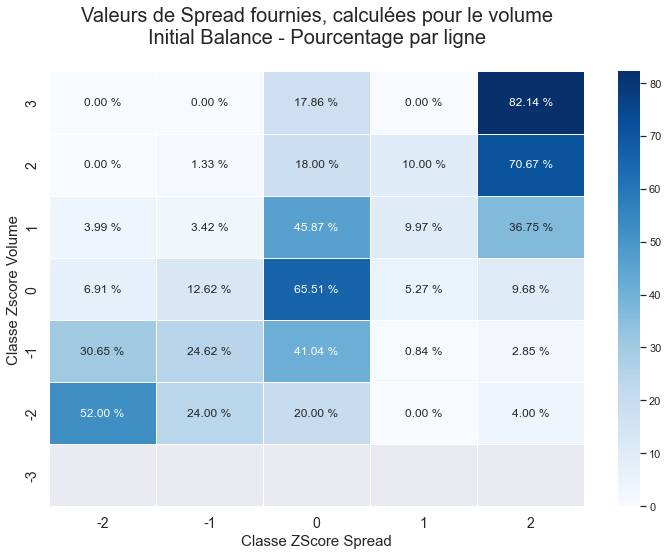

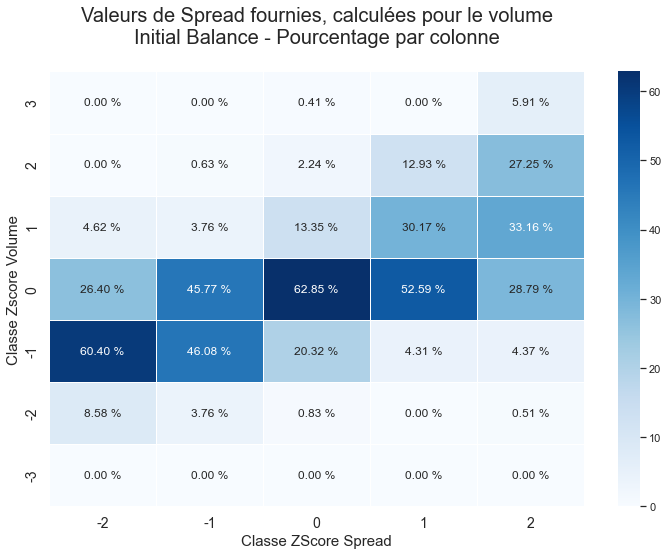

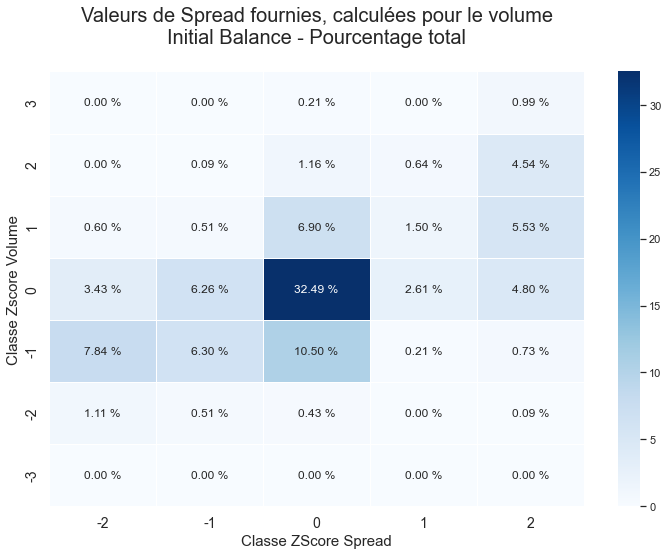

Classe de Spread en fonction de la classe de volume
Restriction à 3 classes


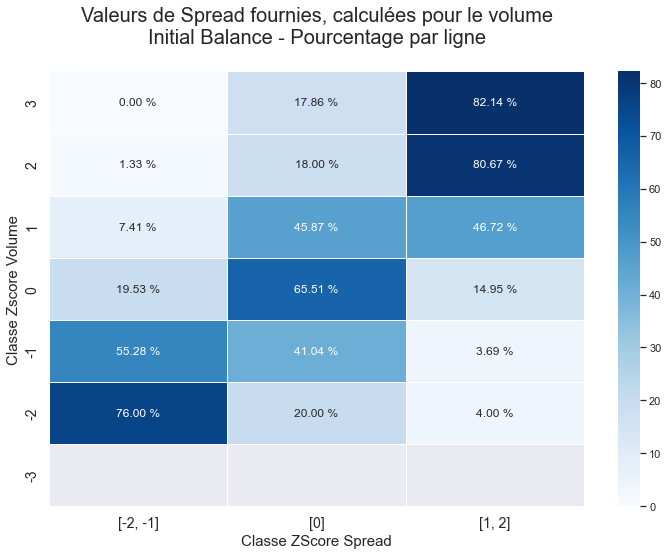

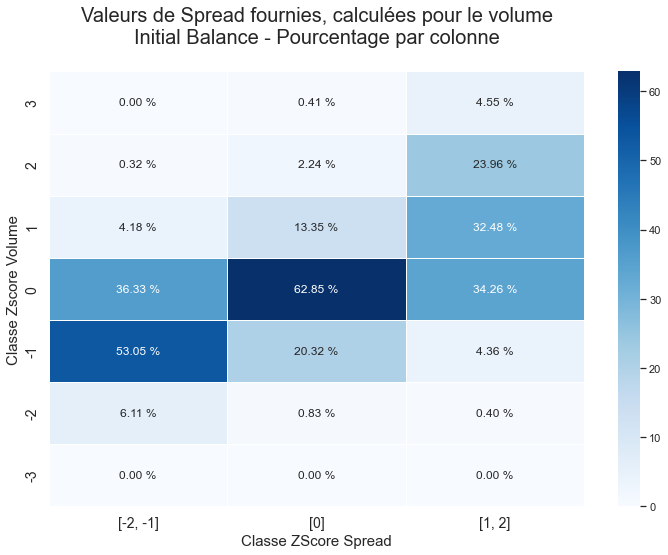

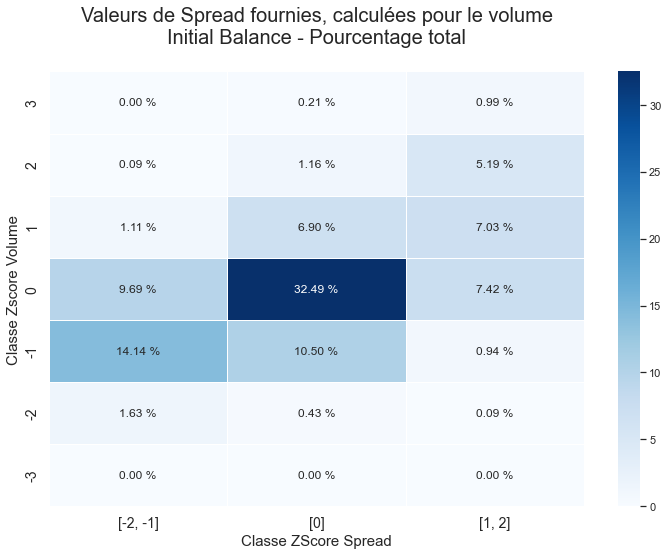

Classe de Spread en fonction de la classe de volume
Restriction à 2 classes


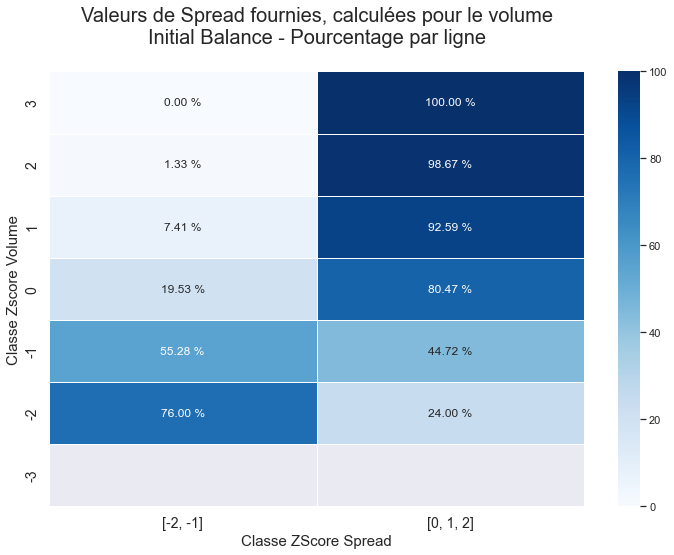

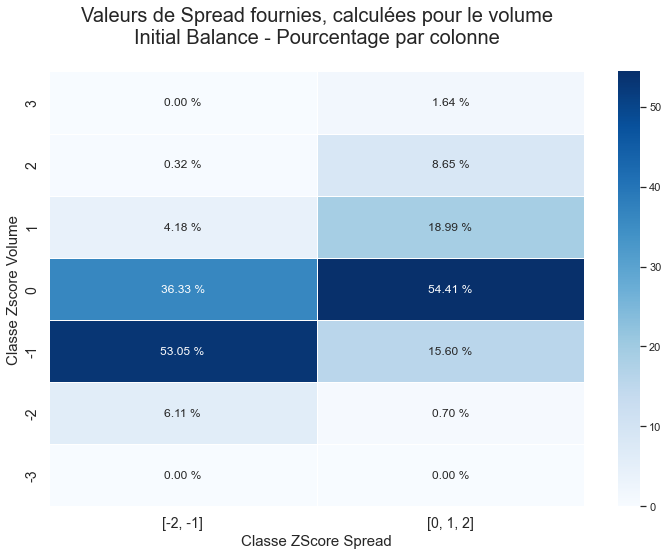

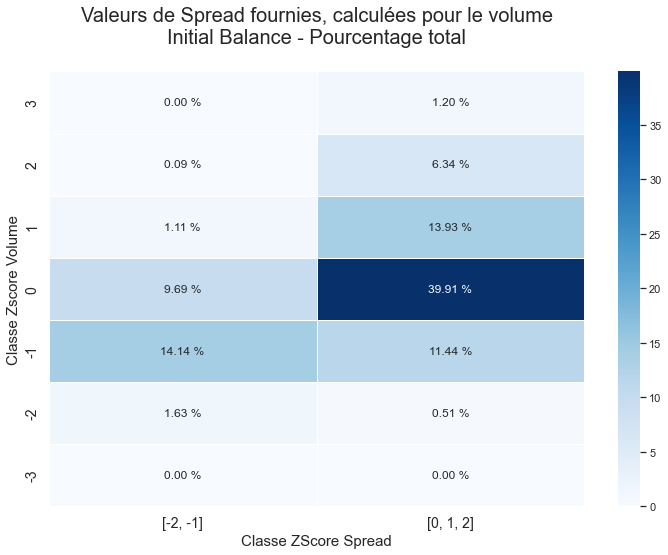

In [37]:
calcul_tout(classe_spread_IB, classe_volume_calcul_IB, "de Spread fournies, calculées pour le volume", "Initial Balance")

# Classes de Spread et de Volume calculées

## 5 minutes

In [38]:
classe_spread_calcul = dataFrame_results_ZScore_5min["ZScore Spread 5min"]
classe_volume_calcul = dataFrame_results_ZScore_5min["ZScore Volume 5min"]

Classe de Spread en fonction de la classe de volume


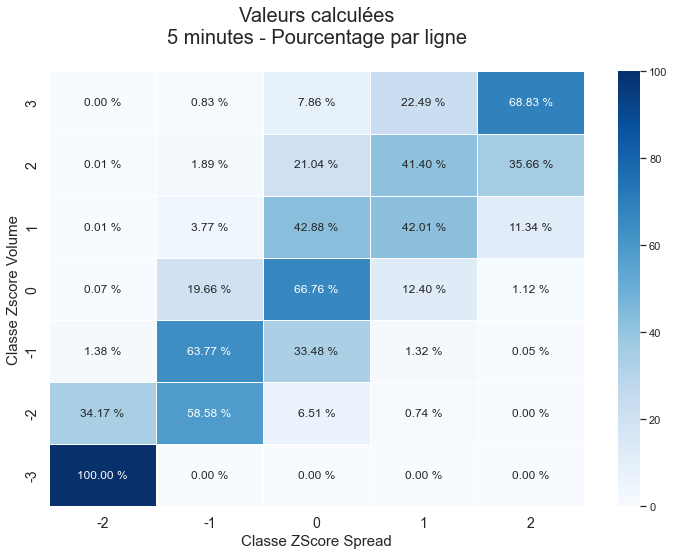

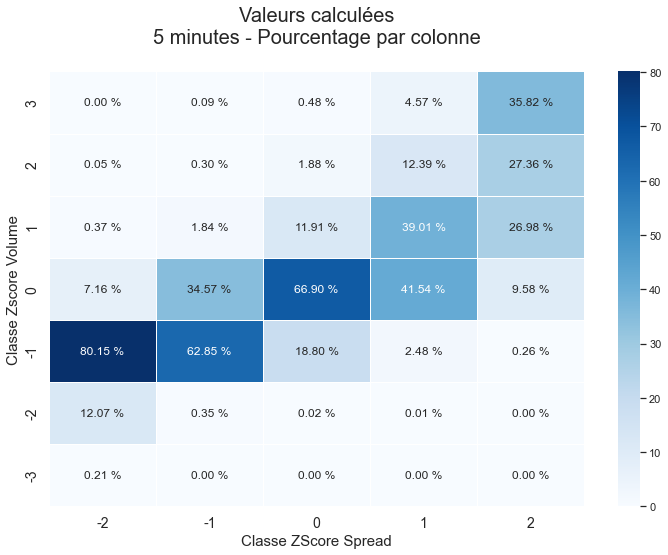

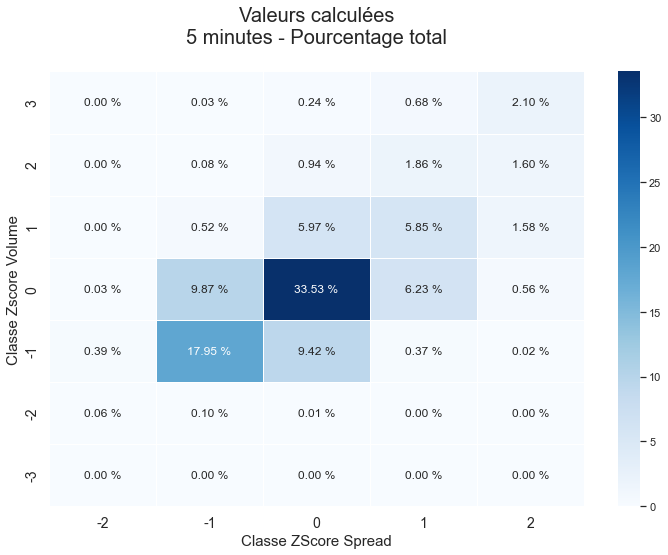

Classe de Spread en fonction de la classe de volume
Restriction à 3 classes


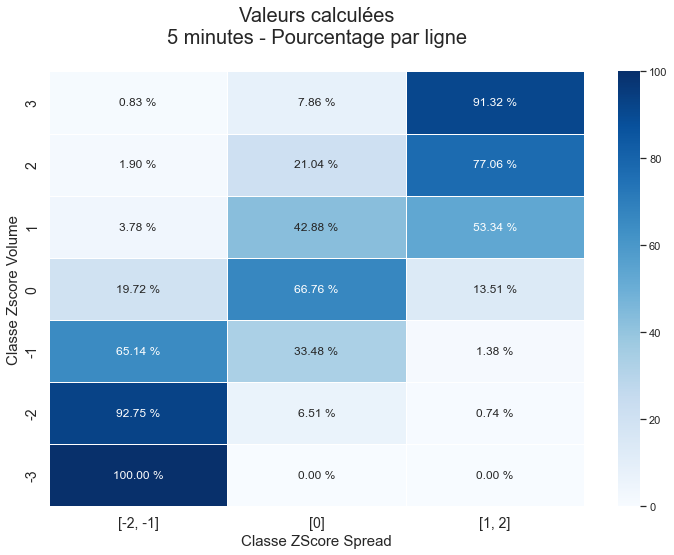

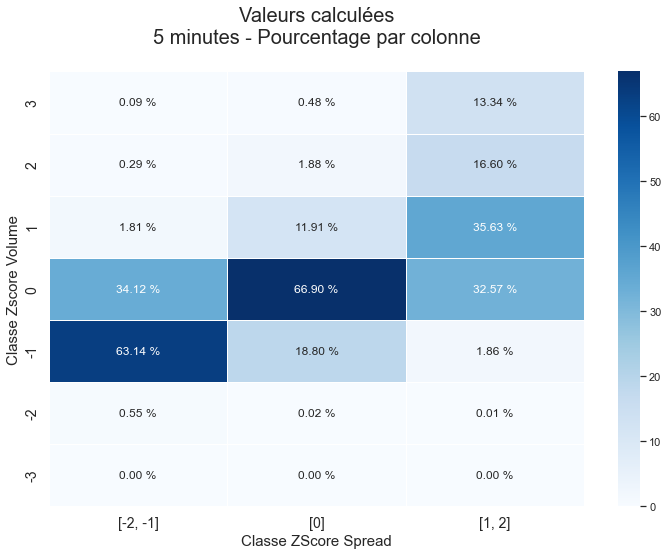

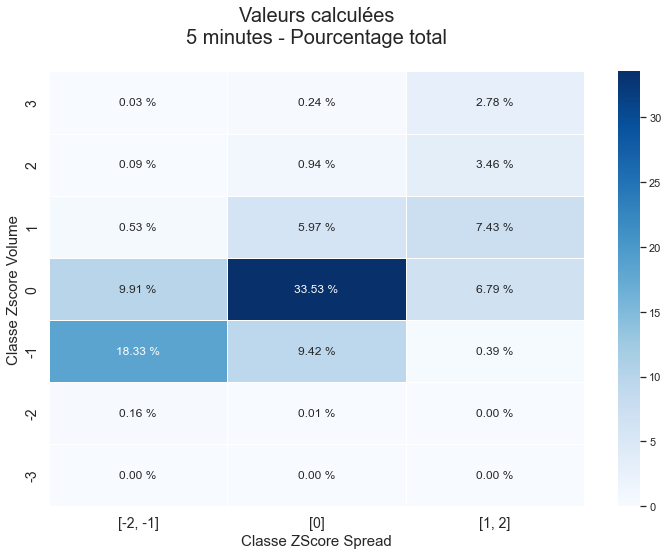

Classe de Spread en fonction de la classe de volume
Restriction à 2 classes


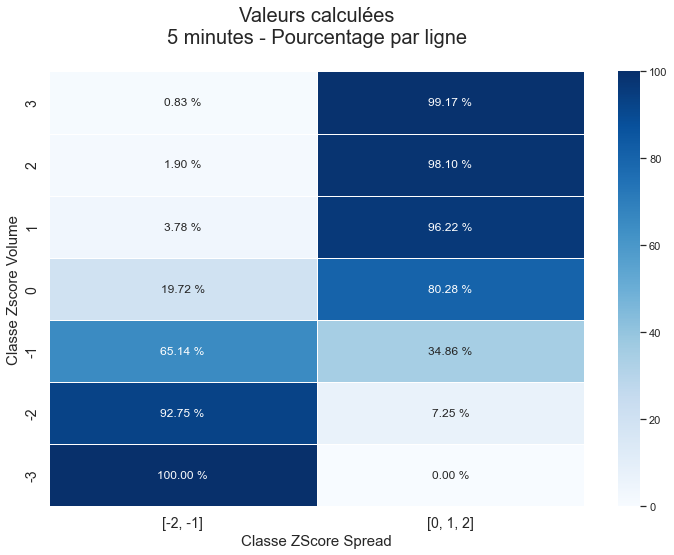

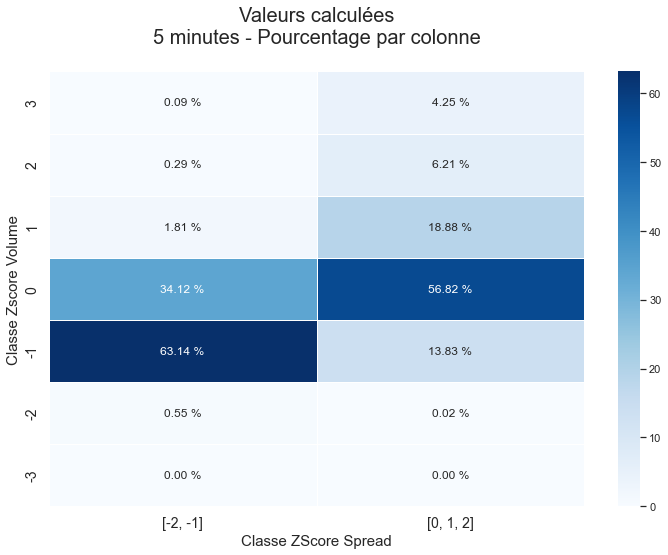

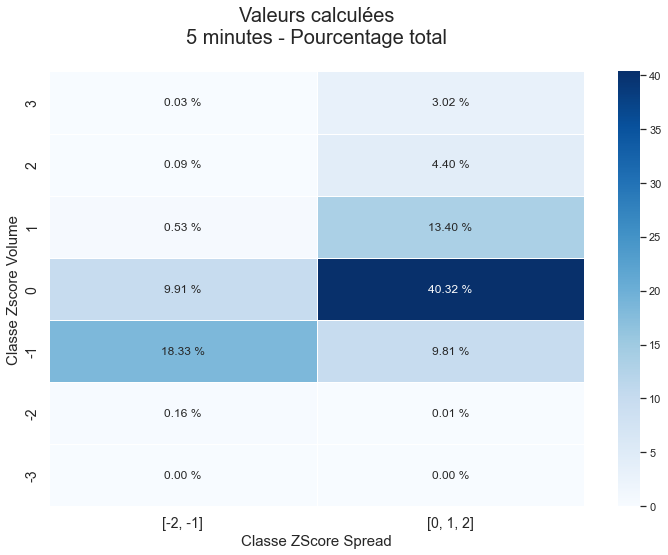

In [39]:
calcul_tout(classe_spread_calcul, classe_volume_calcul, "calculées", "5 minutes")

## Journalier

In [40]:
classe_spread_calcul_daily = dataFrame_results_ZScore["ZScore Spread Daily"]
classe_volume_calcul_daily = dataFrame_results_ZScore["ZScore Volume Daily"]

Classe de Spread en fonction de la classe de volume


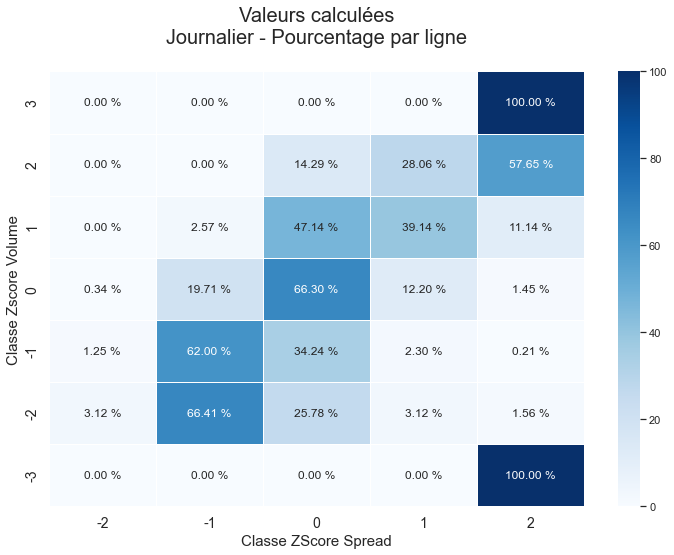

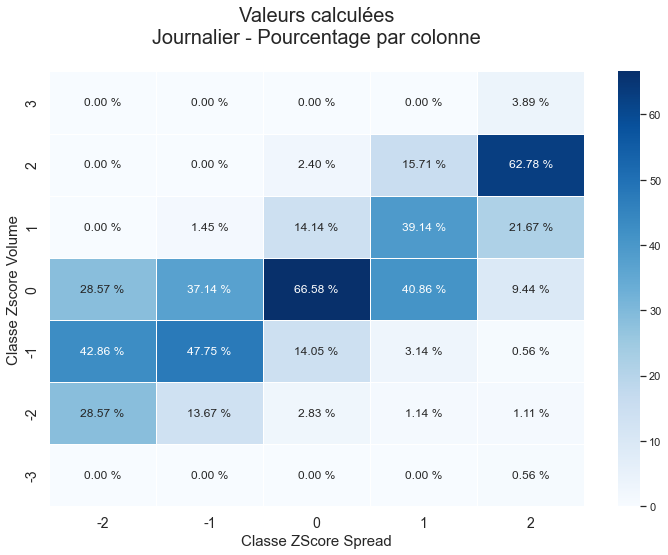

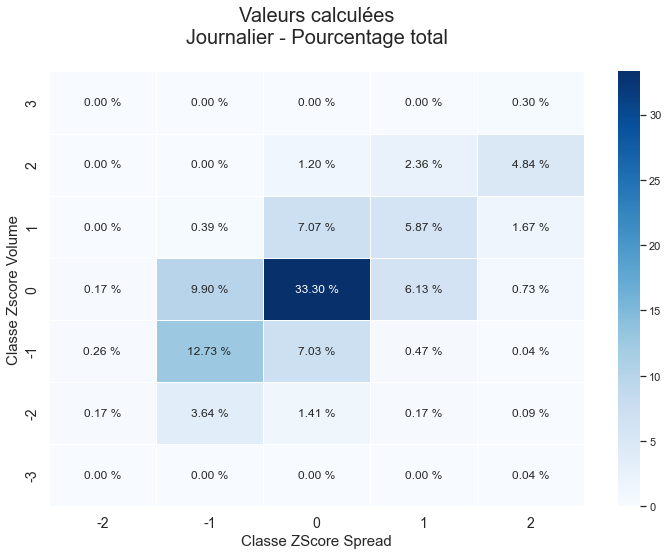

Classe de Spread en fonction de la classe de volume
Restriction à 3 classes


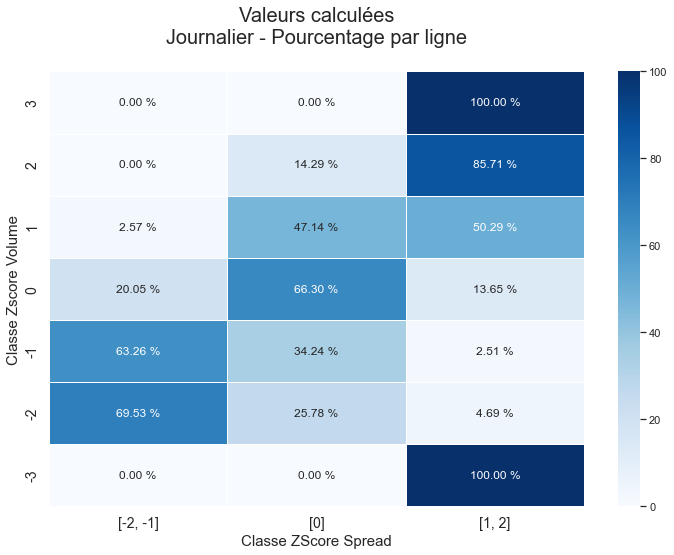

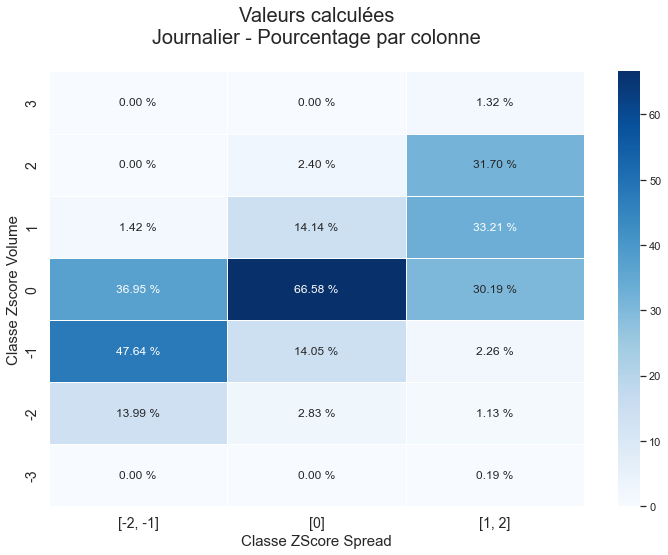

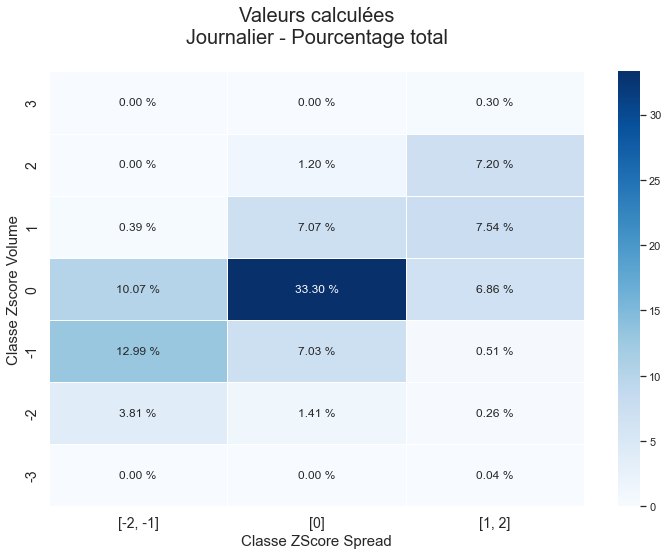

Classe de Spread en fonction de la classe de volume
Restriction à 2 classes


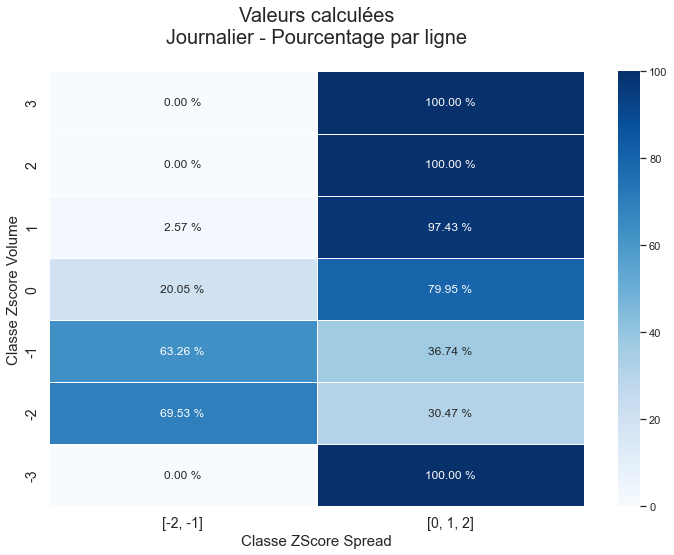

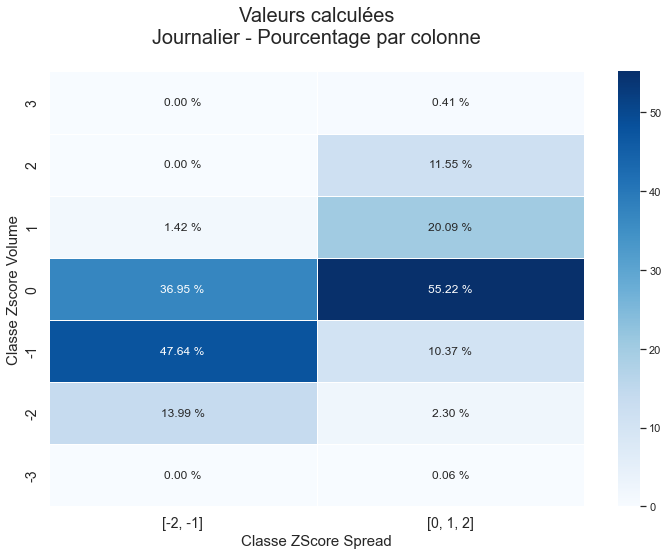

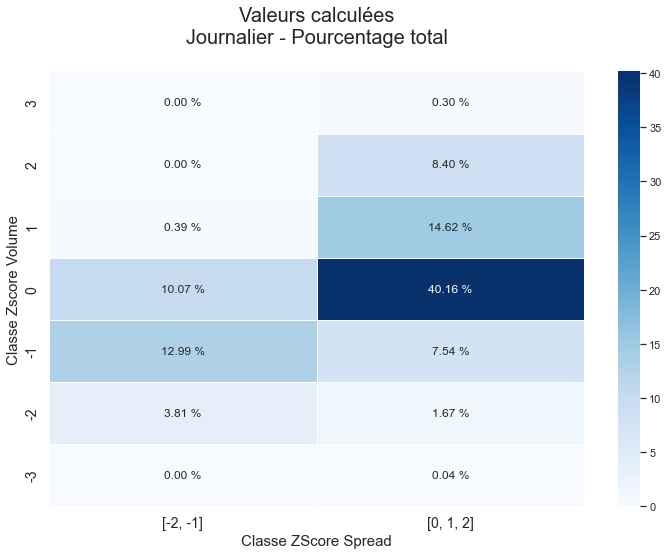

In [41]:
calcul_tout(classe_spread_calcul_daily, classe_volume_calcul_daily, "calculées", "Journalier")

## Initial Balance

In [45]:
classe_spread_calcul_IB = dataFrame_results_ZScore["ZScore Spread IB"]
classe_volume_calcul_IB = dataFrame_results_ZScore["ZScore Volume IB"]

Classe de Spread en fonction de la classe de volume


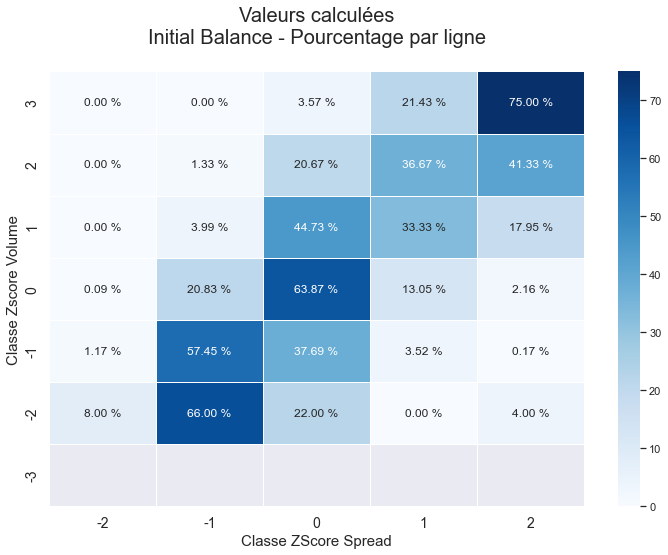

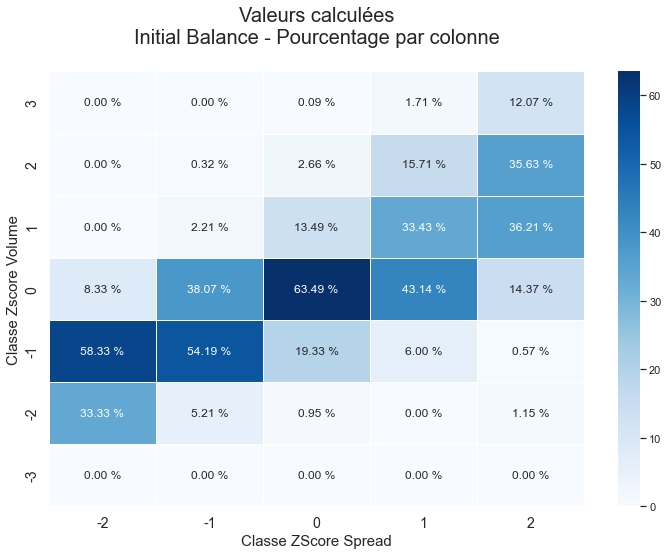

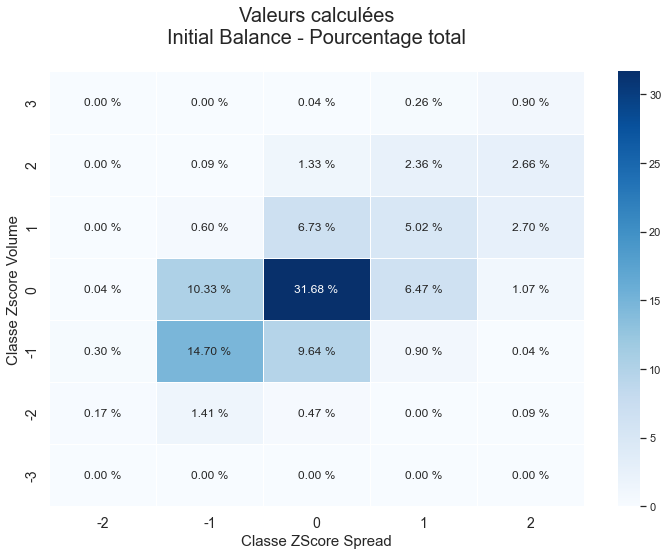

Classe de Spread en fonction de la classe de volume
Restriction à 3 classes


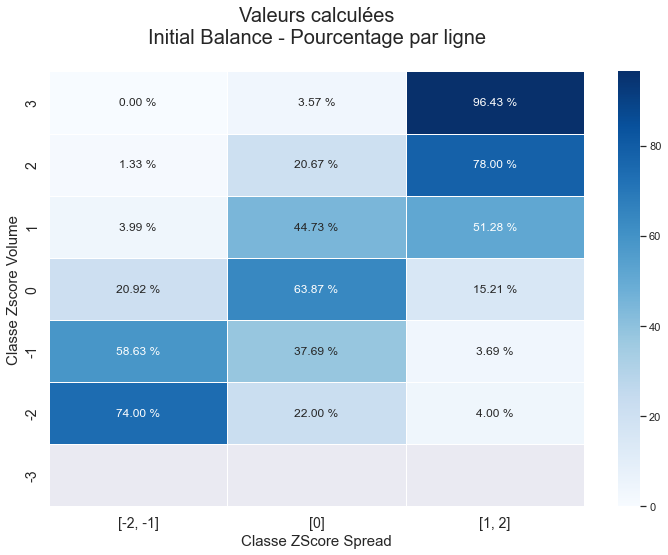

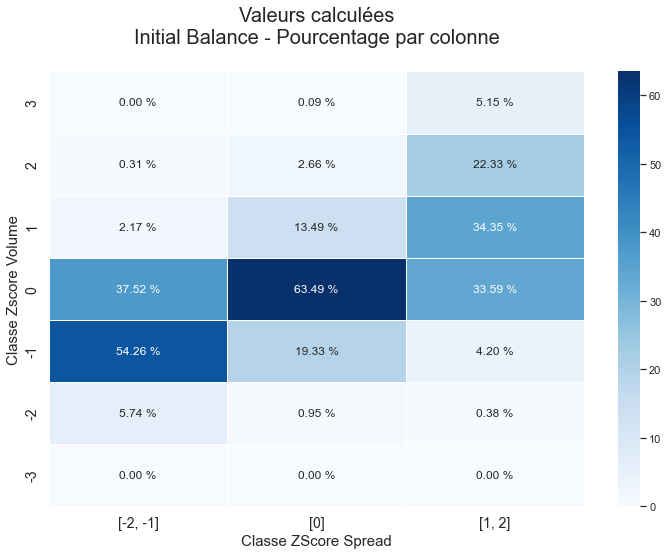

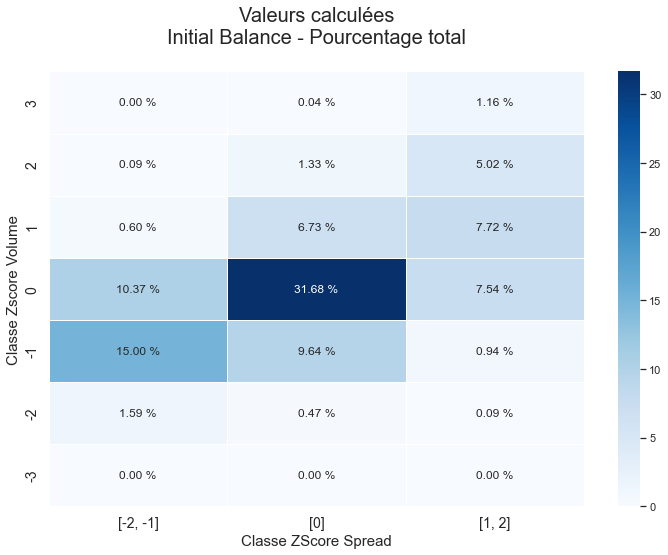

Classe de Spread en fonction de la classe de volume
Restriction à 2 classes


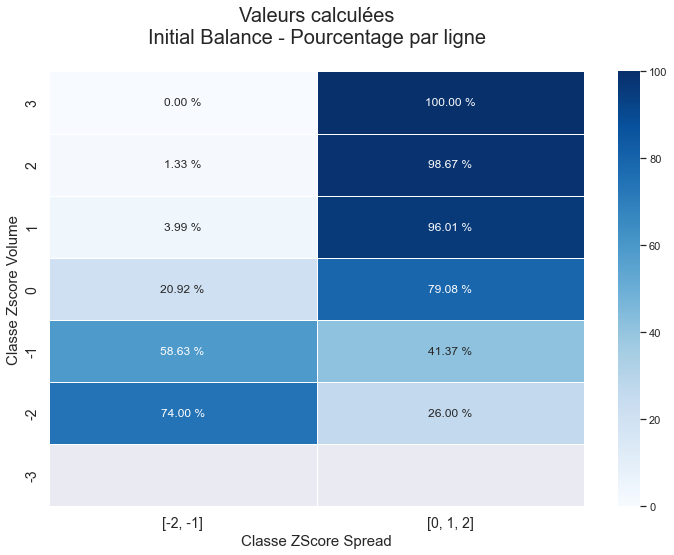

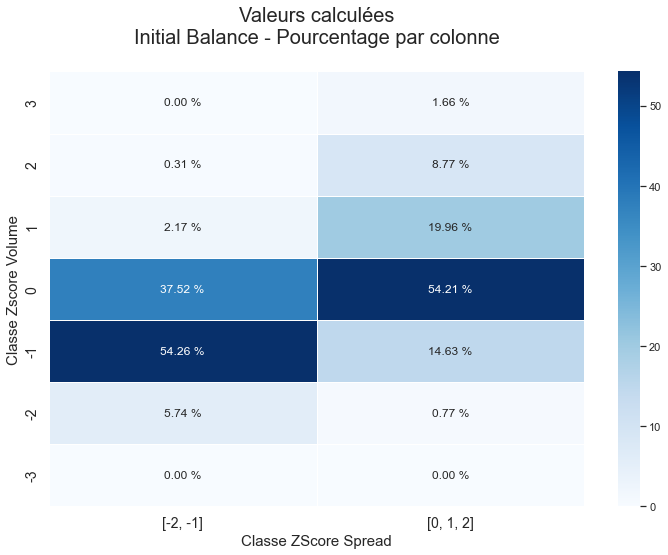

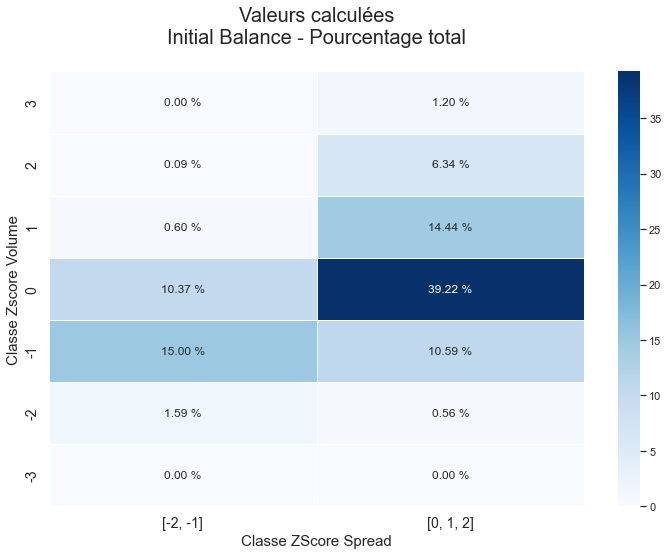

In [43]:
calcul_tout(classe_spread_calcul_IB, classe_volume_calcul_IB, "calculées", "Initial Balance")